# Generate the data
Downloads the poster images and saved a new csv file with the data

In [1]:
data_path = "../data/"

In [2]:
movie_csv = data_path + "movie-genre-from-its-poster/MovieGenre.csv"

In [3]:
import pandas as pd 
# Read data from file 'MovieGenre.csv' 
data = pd.read_csv(movie_csv, encoding = "ISO-8859-1", usecols=['imdbId', 'Genre', 'Title', 'Poster']) 

# Preview the first 5 lines of the loaded data 
data.head()

,imdbId,Title,Genre,Poster
0,114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...


In [4]:
len(data)

40108

### Remove lines with empty cells

In [5]:
import numpy as np
cols=['imdbId', 'Genre', 'Title', 'Poster']
for i in cols:
    data[i].replace('', np.nan, inplace=True)
for i in cols:
    data.dropna(subset=[i], inplace=True)
    
len(data)

39263

### Download movie posters
Check if the poster has a valid url. If the poster exists, download it and save the movie titles and genres to a new file.

In [21]:
import urllib.request
from urllib.error import HTTPError
import os.path

def download_posters(poster_url, path, title):
    if os.path.isfile(path+".jpg"):
        print ("Poster", title ,"exist")
    else:
        try:
            urllib.request.urlretrieve(poster_url, path+".jpg")
        except HTTPError:
            print("Movie",title ,"poster not found!")
            return False
    return True

In [27]:
import re
base_images_path = "../data/images/100/"

df = pd.DataFrame(columns=['imgid', 'title', 'genres'])

for _, row in data.iterrows(): 
    genre = str(row['Genre'])
    genres = str(row['Genre'].split("|"))
    title = str(row['Title'])
    img_id = str(row['imdbId'])    
    # remove years from titles
    title = re.sub(" \(\d{4,}\)", "",  title)
    poster_url = str(row['Poster'])
    #print(title, img_id, genres, genre) 
    
    # download the poster
    poster = download_posters(poster_url, base_images_path+img_id, title)
    
    not_found = 0
    # if poster is not found, skip movie
    if poster == True:
        new_row = {'imgid':img_id ,'title':title, 'genres':genre}    
        df = df.append(new_row, ignore_index=True) 
    else:
        not_found += 1

print("{} posters not found".format(not_found))

Poster Toy Story exist
Poster Jumanji exist
Poster Grumpier Old Men exist
Poster Waiting to Exhale exist
Poster Father of the Bride Part II exist
Poster Heat exist
Poster Sabrina exist
Movie Tom and Huck poster not found!
Poster Sudden Death exist
Poster GoldenEye exist
Poster The American President exist
Poster Dracula: Dead and Loving It exist
Poster Balto exist
Poster Nixon exist
Poster Cutthroat Island exist
Poster Casino exist
Poster Sense and Sensibility exist
Poster Four Rooms exist
Poster Ace Ventura: When Nature Calls exist
Poster Money Train exist
Poster Get Shorty exist
Poster Copycat exist
Poster Assassins exist
Poster Powder exist
Poster Leaving Las Vegas exist
Poster Othello exist
Poster Now and Then exist
Poster Persuasion exist
Poster The City of Lost Children exist
Poster Yao a yao, yao dao wai po qiao exist
Poster Dangerous Minds exist
Poster Twelve Monkeys exist
Poster Wings of Courage exist
Poster Babe exist
Poster Carrington exist
Poster Dead Man Walking exist
Post

Movie Miami Rhapsody poster not found!
Poster My Family exist
Poster Murder in the First exist
Poster Nobody's Fool exist
Poster Nell exist
Poster New Jersey Drive exist
Poster New York Cop exist
Poster Beyond Bedlam exist
Movie Nemesis 2: Nebula poster not found!
Poster Nina Takes a Lover exist
Poster Natural Born Killers exist
Poster Only You exist
Poster Once Were Warriors exist
Movie Poison Ivy II poster not found!
Poster Outbreak exist
Movie Lí©on: The Professional poster not found!
Poster The Perez Family exist
Poster A Pyromaniac's Love Story exist
Poster Pulp Fiction exist
Poster Panther exist
Poster Tui shou exist
Poster Priest exist
Poster Quiz Show exist
Poster Picture Bride exist
Poster Queen Margot exist
Poster The Quick and the Dead exist
Poster Roommates exist
Poster Ready to Wear exist
Poster Three Colors: Red exist
Movie Three Colors: Blue poster not found!
Poster Three Colors: White exist
Poster Pao Da Shuang Deng exist
Poster Rent-a-Kid exist
Poster Relative Fear exi

Movie Threesome poster not found!
Poster The Nightmare Before Christmas exist
Poster The Three Musketeers exist
Poster Tombstone exist
Poster Trial by Jury exist
Movie True Romance poster not found!
Movie The War Room poster not found!
Poster The Pagemaster exist
Poster Paris, France exist
Poster The Beans of Egypt, Maine exist
Movie Killer poster not found!
Poster Welcome to the Dollhouse exist
Poster Germinal exist
Poster Chasers exist
Poster Cronos exist
Poster Naked in New York exist
Poster Kika exist
Poster Bhaji on the Beach exist
Movie Little Big League poster not found!
Poster The Slingshot exist
Poster Wide-Eyed and Legless exist
Poster Foreign Student exist
Poster Ciao, Professore! exist
Poster Spanking the Monkey exist
Poster The Little Rascals exist
Poster íó la mode exist
Poster Andre exist
Poster La scorta exist
Poster Princess Caraboo exist
Poster The Celluloid Closet exist
Poster Cafí© au lait exist
Poster Caro diario exist
Poster I Don't Want to Talk About It exist
Pos

Movie Basquiat poster not found!
Poster Tin Cup exist
Poster Dingo exist
Poster The Ballad of Narayama exist
Poster Un week-end sur deux exist
Movie Mille bolle blu poster not found!
Poster Wuya yu maque exist
Movie The Godfather poster not found!
Poster Maybe... Maybe Not exist
Poster Police Story 3: Supercop exist
Movie Manny & Lo poster not found!
Poster The Wife exist
Poster Small Faces exist
Poster Bound exist
Poster Carpool exist
Poster Death in Brunswick exist
Poster Kansas City exist
Poster Gone Fishin' exist
Poster Lover's Knot exist
Poster Vive L'Amour exist
Poster Shadow of Angels exist
Movie Killer: A Journal of Murder poster not found!
Poster Once a Cop exist
Poster Girls Town exist
Poster Bye-Bye exist
Poster The Relic exist
Poster The Island of Dr. Moreau exist
Poster First Kid exist
Poster The Trigger Effect exist
Poster Sweet Nothing exist
Poster Bogus exist
Poster Bulletproof exist
Poster Talk of Angels exist
Poster The Land Before Time III: The Time of the Great Givi

Movie Monty Python and the Holy Grail poster not found!
Poster Hustler White exist
Poster Dadetown exist
Poster Everything Relative exist
Poster Entertaining Angels: The Dorothy Day Story exist
Poster Hoogste tijd exist
Poster Three Lives and Only One Death exist
Poster The Line King: The Al Hirschfeld Story exist
Poster Snowriders exist
Poster Curtis's Charm exist
Poster When We Were Kings exist
Poster The Wrong Trousers exist
Poster JLG/JLG - autoportrait de dí©cembre exist
Movie The Return of Martin Guerre poster not found!
Poster Faust exist
Poster He Walked by Night exist
Poster Raw Deal exist
Poster T-Men exist
Poster Zaproszenie exist
Poster I bambini ci guardano exist
Poster Pastoral Symphony exist
Poster Here Comes Cookie exist
Poster Love in Bloom exist
Poster Six of a Kind exist
Poster The Tin Drum exist
Poster The Ruling Class exist
Poster Mina Tannenbaum exist
Poster 2 ou 3 choses que je sais d'elle exist
Poster The Bloody Child exist
Poster Dear God exist
Poster Bad Moon 

Movie The Last of the Mohicans poster not found!
Poster Michael exist
Movie The Evening Star poster not found!
Poster Hamlet exist
Poster Some Mother's Son exist
Poster The Whole Wide World exist
Poster Mother exist
Poster Thieves exist
Poster Evita exist
Poster The Portrait of a Lady exist
Poster Walkabout exist
Poster Message to Love: The Isle of Wight Festival exist
Poster Murder at 1600 exist
Poster Hearts & Minds exist
Poster Inside exist
Poster Fierce Creatures exist
Poster Zeus and Roxanne exist
Poster Turbulence exist
Poster Angel Baby exist
Poster Police Story 4: First Strike exist
Poster Underworld exist
Poster Beverly Hills Ninja exist
Poster Metro exist
Poster La machine exist
Poster Falling in Love Again exist
Poster The Cement Garden exist
Poster Dante's Peak exist
Poster Meet Wally Sparks exist
Poster Amos & Andrew exist
Poster Benny & Joon exist
Poster Prefontaine exist
Poster A Tickle in the Heart exist
Poster Guantanamera exist
Poster McHale's Navy exist
Poster Kolya 

Movie Firestorm poster not found!
Poster Senseless exist
Poster Wag the Dog exist
Poster Dark City exist
Movie The Leading Man poster not found!
Poster Star Kid exist
Poster Hard Rain exist
Poster Half Baked exist
Poster Fallen exist
Poster Shooting Fish exist
Poster The Prophecy II exist
Poster Fallen Angels exist
Poster Four Days in September exist
Poster Spice World exist
Poster Deep Rising exist
Poster Tainted exist
Poster A Letter from Death Row exist
Poster Music from Another Room exist
Poster Mother and Son exist
Poster The Replacement Killers exist
Poster B. Monkey exist
Poster The Night Flier exist
Movie Blues Brothers 2000 poster not found!
Movie Tokyo Fist poster not found!
Poster Mass Transit exist
Poster Ride exist
Poster The Wedding Singer exist
Poster Sphere exist
Poster Ayn Rand: A Sense of Life exist
Poster The Break exist
Poster Little City exist
Movie Palmetto poster not found!
Poster As Good as It Gets exist
Poster King of New York exist
Poster A Paralyzing Fear: Th

Poster Dong gong xi gong exist
Poster The Million Dollar Duck exist
Poster The Barefoot Executive exist
Poster The Black Cauldron exist
Poster The Black Hole exist
Movie Blackbeard's Ghost poster not found!
Poster Blank Check exist
Poster Candleshoe exist
Movie The Cat from Outer Space poster not found!
Poster Cheetah exist
Poster The Computer Wore Tennis Shoes exist
Movie Condorman poster not found!
Poster D2: The Mighty Ducks exist
Poster Darby O'Gill and the Little People exist
Poster The Devil and Max Devlin exist
Poster A Far Off Place exist
Poster Flight of the Navigator exist
Poster The Gnome-Mobile exist
Poster The Great Mouse Detective exist
Poster The Happiest Millionaire exist
Poster Herbie Goes Bananas exist
Poster Herbie Goes to Monte Carlo exist
Poster Hocus Pocus exist
Poster Honey I Blew Up the Kid exist
Poster Honey, I Shrunk the Kids exist
Movie Hot Lead and Cold Feet poster not found!
Poster In Search of the Castaways exist
Poster The Incredible Journey exist
Poster 

Poster Life Is Beautiful exist
Poster Orgazmo exist
Poster Shattered Image exist
Poster Tales from the Darkside: The Movie exist
Poster Vampires exist
Movie American History X poster not found!
Poster Hands on a Hard Body: The Documentary exist
Poster Living Out Loud exist
Poster Belly exist
Poster Gods and Monsters exist
Poster The Siege exist
Poster The Waterboy exist
Poster Elizabeth exist
Poster Velvet Goldmine exist
Poster I Still Know What You Did Last Summer exist
Poster I'll Be Home for Christmas exist
Poster Meet Joe Black exist
Poster Dancing at Lughnasa exist
Poster Hard Core Logo exist
Poster The Naked Man exist
Poster Runaway Train exist
Poster Desert Bloom exist
Poster The Stepford Wives exist
Poster The Pope of Greenwich Village exist
Poster Sid and Nancy exist
Poster Mona Lisa exist
Poster Heart Condition exist
Poster The Nights of Cabiria exist
Poster The Big Chill exist
Poster Enemy of the State exist
Poster The Rugrats Movie exist
Poster A Bug's Life exist
Poster Cel

Poster Lost & Found exist
Poster Pushing Tin exist
Poster Election exist
Poster eXistenZ exist
Poster A Little Bit of Soul exist
Poster Goliathon exist
Poster NíÇ exist
Poster Let It Come Down: The Life of Paul Bowles exist
Poster Entrapment exist
Poster Idle Hands exist
Poster Get Real exist
Poster Heaven exist
Poster Bian Lian exist
Poster Three Seasons exist
Poster The Winslow Boy exist
Poster Mildred Pierce exist
Poster Night of the Comet exist
Poster Chopping Mall exist
Poster My Science Project exist
Poster Dick Tracy exist
Poster The Mummy exist
Poster The Castle exist
Poster Mascara exist
Poster This Is My Father exist
Poster Xiu Xiu: The Sent-Down Girl exist
Poster A Midsummer Night's Dream exist
Poster Trippin' exist
Poster After Life exist
Poster Hak hap exist
Poster Edge of Seventeen exist
Poster Endurance exist
Poster Star Wars: Episode I - The Phantom Menace exist
Poster The Love Letter exist
Movie L'assedio poster not found!
Poster Frogs for Snakes exist
Poster Rekopis z

Movie Armour of God 2: Operation Condor poster not found!
Poster Lung hing foo dai exist
Poster Double Jeopardy exist
Poster Jakob the Liar exist
Poster Mumford exist
Poster Dog Park exist
Poster Guinevere exist
Poster The Adventures of Elmo in Grouchland exist
Poster Simon Sez exist
Poster Drive Me Crazy exist
Poster Mystery, Alaska exist
Poster Three Kings exist
Poster Happy, Texas exist
Poster New Rose Hotel exist
Poster Plunkett & Macleane exist
Poster Romance exist
Movie Napoleon and Samantha poster not found!
Poster Alvarez Kelly exist
Poster And the Ship Sails On exist
Poster The Dark Half exist
Poster Gulliver's Travels exist
Poster Monkey Shines exist
Poster Phantasm exist
Poster Psycho II exist
Poster Psycho III exist
Poster Rain exist
Poster Sanjuro exist
Poster Random Hearts exist
Poster Superstar exist
Poster Boys Don't Cry exist
Poster Five Wives, Three Secretaries and Me exist
Movie L'ennui poster not found!
Poster The Grandfather exist
Poster The Limey exist
Poster The 

Movie Simpatico poster not found!
Poster Topsy-Turvy exist
Poster The Alley Cats exist
Poster Boiling Point exist
Poster Brenda Starr exist
Poster Carnal Knowledge exist
Movie Easy Rider poster not found!
Poster The Falcon and the Snowman exist
Movie Hi-Yo Silver poster not found!
Poster Room at the Top exist
Poster Ulysses exist
Poster Any Given Sunday exist
Poster Man on the Moon exist
Poster Galaxy Quest exist
Poster The Talented Mr. Ripley exist
Poster Next Friday exist
Poster The Hurricane exist
Poster Angela's Ashes exist
Poster Play It to the Bone exist
Poster Titus exist
Poster Mr. Death: The Rise and Fall of Fred A. Leuchter, Jr. exist
Poster The Third Miracle exist
Poster Montana exist
Poster Snow Falling on Cedars exist
Poster Girl, Interrupted exist
Poster Trans exist
Poster The Life and Times of Hank Greenberg exist
Poster My Dog Skip exist
Poster Supernova exist
Poster The Quarry exist
Poster Theeviravaathi: The Terrorist exist
Poster The Way We Were exist
Poster Tess of 

Poster Eyes of Laura Mars exist
Poster Funny Bones exist
Poster The Good Earth exist
Poster Good Morning, Vietnam exist
Poster The Good Mother exist
Poster Grumpy Old Men exist
Poster Guess Who's Coming to Dinner exist
Poster Romeo Must Die exist
Poster Here on Earth exist
Poster Whatever It Takes exist
Poster Buddy Boy exist
Poster The Color of Paradise exist
Poster Waking the Dead exist
Poster Sangre y arena exist
Movie Gothic poster not found!
Poster Hillbillys in a Haunted House exist
Poster Lord of the Flies exist
Poster Modern Times exist
Poster Last Resort exist
Poster Solar Crisis exist
Poster That's Life! exist
Poster Heart and Souls exist
Poster Hud exist
Poster The Hustler exist
Poster Inherit the Wind exist
Poster Dersu Uzala exist
Poster Close Encounters of the Third Kind exist
Poster The City of the Dead exist
Poster Jonah Who Will Be 25 in the Year 2000 exist
Poster Retroactive exist
Poster A Place in the Sun exist
Movie Jacob's Ladder poster not found!
Poster Empire Rec

Movie Trouble in Paradise poster not found!
Poster Big Trouble in Little China exist
Poster Badlands exist
Poster Battleship Potemkin exist
Poster Boys and Girls exist
Poster Shaft exist
Poster Titan A.E. exist
Poster Butterfly exist
Poster Jesus' Son exist
Poster The Match exist
Poster Marcel Proust's Time Regained exist
Poster Boricua's Bond exist
Poster Chicken Run exist
Poster Me, Myself & Irene exist
Poster The Patriot exist
Poster The Adventures of Rocky & Bullwinkle exist
Poster The Perfect Storm exist
Movie The Golden Bowl poster not found!
Poster Asylum exist
Poster Communion exist
Movie Fun & Fancy Free poster not found!
Poster The Kentucky Fried Movie exist
Poster Blood In, Blood Out exist
Poster Daughter of Dr. Jekyll exist
Poster F/X exist
Poster F/X2 exist
Movie The Hot Spot poster not found!
Poster Missing in Action exist
Poster Missing in Action 2: The Beginning exist
Poster Braddock: Missing in Action III exist
Poster Thunderbolt and Lightfoot exist
Poster Dreamscape e

Movie Finding Forrester poster not found!
Poster The Gift exist
Poster Before Night Falls exist
Poster Cast Away exist
Poster The Family Man exist
Poster The House of Mirth exist
Poster Miss Congeniality exist
Poster Nowhere to Hide exist
Poster O Brother, Where Art Thou? exist
Poster Songcatcher exist
Poster State and Main exist
Poster Dracula 2000 exist
Movie All the Pretty Horses poster not found!
Poster An Everlasting Piece exist
Poster Thirteen Days exist
Movie Traffic poster not found!
Poster The Claim exist
Poster Shadow of the Vampire exist
Poster House of Games exist
Movie Kill Me Again poster not found!
Poster Annie exist
Poster Don't Tell Mom the Babysitter's Dead exist
Poster An Officer and a Gentleman exist
Poster The Alamo exist
Poster At Close Range exist
Poster Breaker! Breaker! exist
Poster Breakheart Pass exist
Poster Friendly Persuasion exist
Poster Gettysburg exist
Poster Imaginary Crimes exist
Poster Rancho Deluxe exist
Poster The St. Francisville Experiment exist


Poster Throw Momma from the Train exist
Poster Yi Yi exist
Poster Midnight Madness exist
Poster Nattevagten exist
Poster The Sand Pebbles exist
Poster Twelve O'Clock High exist
Poster Von Ryan's Express exist
Poster The Animal exist
Poster What's the Worst That Could Happen? exist
Poster Big Eden exist
Poster Evolution exist
Poster Swordfish exist
Poster The Anniversary Party exist
Poster Bride of the Wind exist
Poster Musí_me si pomíçhat exist
Poster Whatever Happened to Harold Smith? exist
Poster Catch-22 exist
Poster Forgotten Silver exist
Poster Point Break exist
Poster Shag exist
Poster Uncommon Valor exist
Poster Unlawful Entry exist
Poster Youngblood exist
Movie Gentlemen Prefer Blondes poster not found!
Poster How to Marry a Millionaire exist
Poster Macabre exist
Poster The Seven Year Itch exist
Poster There's No Business Like Show Business exist
Poster Tootsie exist
Movie The Boys Next Door poster not found!
Poster Too Late the Hero exist
Poster The Trio exist
Poster Pavilion 

Movie Gleaming the Cube poster not found!
Poster Going Overboard exist
Poster Great Balls of Fire! exist
Poster Gross Anatomy exist
Poster Happy Together exist
Poster Harlem Nights exist
Movie Her Alibi poster not found!
Poster Homer and Eddie exist
Poster How to Get Ahead in Advertising exist
Movie Immediate Family poster not found!
Poster In Country exist
Poster An Innocent Man exist
Movie Jacknife poster not found!
Poster The January Man exist
Movie Johnny Handsome poster not found!
Poster Jesus of Montreal exist
Poster K-9 exist
Poster Kickboxer exist
Poster Last Exit to Brooklyn exist
Poster Lean on Me exist
Poster Let It Ride exist
Poster Leviathan exist
Poster Little Monsters exist
Poster Lock Up exist
Poster Look Who's Talking exist
Poster Loverboy exist
Poster Major League exist
Poster Meet the Feebles exist
Poster Millennium exist
Poster Miracle Mile exist
Poster Miss Firecracker exist
Poster New York Stories exist
Poster Next of Kin exist
Poster No Holds Barred exist
Poster 

Movie Donnie Darko poster not found!
Poster High Heels and Low Lifes exist
Poster Life as a House exist
Poster The Man Who Wasn't There exist
Poster Aí¿e exist
Poster La ville est tranquille exist
Movie Trembling Before G-d poster not found!
Movie Domestic Disturbance poster not found!
Poster Monsters, Inc. exist
Poster The One exist
Poster Tape exist
Poster Heist exist
Poster Shallow Hal exist
Poster King of the Jungle exist
Poster Maze exist
Poster When a Stranger Calls exist
Poster Timerider: The Adventure of Lyle Swann exist
Poster The Wash exist
Poster Harry Potter and the Sorcerer's Stone exist
Poster The Fluffer exist
Poster Novocaine exist
Poster Black Knight exist
Poster Out Cold exist
Poster Spy Game exist
Poster The Devil's Backbone exist
Poster In the Bedroom exist
Movie Cosíå ridevano poster not found!
Poster Hell Up in Harlem exist
Poster Bucktown exist
Poster Across 110th Street exist
Poster Le Petit Soldat exist
Poster The Incredible Shrinking Woman exist
Poster Katie T

Movie Divorcing Jack poster not found!
Poster The Field exist
Poster Hidden Agenda exist
Poster Luminarias exist
Poster The Magnificent Ambersons exist
Poster Fun exist
Poster Gloria exist
Poster The Great Rock 'n' Roll Swindle exist
Movie Hangar 18 poster not found!
Poster Hawk the Slayer exist
Poster He Knows You're Alone exist
Poster Heaven's Gate exist
Movie Hero at Large poster not found!
Poster Honeysuckle Rose exist
Poster Hopscotch exist
Poster How to Beat the High Co$t of Living exist
Movie Humanoids from the Deep poster not found!
Movie Inside Moves poster not found!
Poster The Island exist
Poster The Jazz Singer exist
Movie Ko to tamo peva poster not found!
Poster Zombie Lake exist
Poster Lion of the Desert exist
Poster Little Darlings exist
Poster The Long Good Friday exist
Poster The Long Riders exist
Movie The Man Who Saw Tomorrow poster not found!
Poster Eaten Alive! exist
Poster Mon oncle d'Amí©rique exist
Poster The Monster Club exist
Poster Death Watch exist
Poster Mo

Poster Road to Perdition exist
Poster All About Lily Chou-Chou exist
Poster My Wife Is an Actress exist
Poster Never Again exist
Poster 20 Million Miles to Earth exist
Poster Grand Theft Auto exist
Poster The Importance of Being Earnest exist
Movie Perfect poster not found!
Poster 1776 exist
Poster Fox and His Friends exist
Poster The Legend of Boggy Creek exist
Poster Z exist
Poster Halloween: Resurrection exist
Movie Sex and Lucia poster not found!
Poster Eight Legged Freaks exist
Poster K-19: The Widowmaker exist
Poster Stuart Little 2 exist
Poster Austin Powers in Goldmember exist
Poster The Country Bears exist
Poster The Kid Stays in the Picture exist
Poster Happy Times exist
Poster Tadpole exist
Poster Who Is Cletis Tout? exist
Poster Harry and Walter Go to New York exist
Poster Hí_ndler der vier Jahreszeiten exist
Poster Nosferatu the Vampyre exist
Poster The Big Bus exist
Poster The Eddy Duchin Story exist
Poster Fathom exist
Poster In Like Flint exist
Poster La Terra Trema exi

Movie Going Ape! poster not found!
Poster Goodbye Pork Pie exist
Poster Gregory's Girl exist
Poster Gí_ta kanal eller Vem drog ur proppen? exist
Poster The Hand exist
Poster Happy Birthday to Me exist
Movie Heartbeeps poster not found!
Poster Historien om Kim Skov exist
Movie Horror Planet poster not found!
Poster Ladies and Gentlemen, the Fabulous Stains exist
Poster Lady Chatterley's Lover exist
Poster The Legend of the Lone Ranger exist
Poster Lili Marleen exist
Poster Lola exist
Poster Looker exist
Poster The Looney, Looney, Looney Bugs Bunny Movie exist
Poster Madman exist
Poster Mis exist
Poster Modern Problems exist
Poster Modern Romance exist
Poster Ms .45 exist
Poster My Bloody Valentine exist
Poster My Dinner with Andre exist
Poster Neighbors exist
Poster Night of the Zombies exist
Poster The Night the Lights Went Out in Georgia exist
Poster Only When I Laugh exist
Poster Pennies from Heaven exist
Poster Pieces exist
Movie Piranha Part Two: The Spawning poster not found!
Post

Poster Im toten Winkel - Hitlers Sekretí_rin exist
Poster Im Spiegel der Maya Deren exist
Movie Blind Date poster not found!
Poster Bullet exist
Movie Claudine poster not found!
Poster Dead Reckoning exist
Poster The Devil at 4 O'Clock exist
Poster Ethan Frome exist
Poster Gus exist
Poster The Harder They Come exist
Poster The Horse in the Gray Flannel Suit exist
Poster Krush Groove exist
Movie The Moon-Spinners poster not found!
Poster Sugar Hill exist
Poster Chaos exist
Poster Biker Boyz exist
Poster Final Destination 2 exist
Poster The Recruit exist
Poster The Guru exist
Poster Kedma exist
Poster Lost in La Mancha exist
Poster May exist
Poster The Harder They Fall exist
Poster I'm All Right Jack exist
Poster Murder by Decree exist
Poster Ordinary Decent Criminal exist
Poster Pursued exist
Poster Big Time Operators exist
Poster Tokyo Decadence exist
Movie Two Way Stretch poster not found!
Poster La femme infidíÂle exist
Poster Victim exist
Poster Endangered Species exist
Poster The S

Poster Gunfight at the O.K. Corral exist
Poster High Society exist
Poster Kiss Me Kate exist
Poster The Matrix Reloaded exist
Poster Dracula: Pages from a Virgin's Diary exist
Poster Down with Love exist
Poster Cinemania exist
Poster Friends and Family exist
Poster L'auberge espagnole exist
Poster Pokí©mon Heroes exist
Poster Bruce Almighty exist
Poster The In-Laws exist
Poster Gigantic (A Tale of Two Johns) exist
Poster Respiro exist
Poster Finding Nemo exist
Poster The Italian Job exist
Poster Wrong Turn exist
Poster Capturing the Friedmans exist
Poster As TríÈs Marias exist
Poster He ni zai yi qi exist
Poster 2 Fast 2 Furious exist
Poster Love the Hard Way exist
Poster Whale Rider exist
Poster Nevada Smith exist
Poster Zong heng si hai exist
Poster Behind the Lines exist
Poster Silk Stockings exist
Movie Snowball Express poster not found!
Poster A Man Called Horse exist
Poster For Sale exist
Poster Big Jake exist
Poster The Crazies exist
Poster Dementia 13 exist
Poster Bizarre, Biza

Movie Tokyo Story poster not found!
Movie Summer poster not found!
Poster THX 1138 exist
Poster Valley of the Dolls exist
Poster The Business of Fancydancing exist
Poster Chunhyangdyun exist
Poster Tunes of Glory exist
Poster Kind Hearts and Coronets exist
Poster Ash Wednesday exist
Poster Joe Kidd exist
Poster The Keep exist
Poster Atragon exist
Poster The Mysterians exist
Poster Attack of the Puppet People exist
Poster The Beast from 20,000 Fathoms exist
Poster 10 exist
Poster Tremors exist
Poster The Red Shoes exist
Poster Me & Isaac Newton exist
Poster The Pink Panther exist
Poster The Pink Panther Strikes Again exist
Poster Commando exist
Poster Dracula exist
Poster The Discreet Charm of the Bourgeoisie exist
Poster Waco: The Rules of Engagement exist
Poster Wo de fu qin mu qin exist
Poster Ikiru exist
Poster Comic Book Villains exist
Poster An Angel at My Table exist
Poster War Photographer exist
Poster çAy, Carmela! exist
Poster War and Peace exist
Poster Loin exist
Poster Inci

Movie The Matrix Revolutions poster not found!
Poster The Revolution Will Not Be Televised exist
Poster Elf exist
Poster Anything But Love exist
Poster Billabong Odyssey exist
Poster Gloomy Sunday exist
Poster Dans ma peau exist
Poster Just an American Boy exist
Poster Love Actually exist
Poster Dí©fense d'aimer exist
Poster Father of the Bride exist
Poster My Architect exist
Poster Looney Tunes: Back in Action exist
Poster Master and Commander: The Far Side of the World exist
Poster Tupac: Resurrection exist
Poster The Big Empty exist
Poster The Missing exist
Poster The Cat in the Hat exist
Poster Gothika exist
Poster 21 Grams exist
Poster The Barbarian Invasions exist
Poster Blindness exist
Poster Lan se da men exist
Poster Bad Santa exist
Poster The Haunted Mansion exist
Poster Timeline exist
Poster Marquis exist
Poster Damage exist
Poster OT: Our Town exist
Poster Devil's Playground exist
Poster Dance with a Stranger exist
Poster Journeys with George exist
Poster Darkman exist
Post

Movie Koroshiya 1 poster not found!
Poster A Boy and His Dog exist
Poster The Last Tycoon exist
Poster Ashes and Diamonds exist
Poster Marooned exist
Poster King David exist
Poster Kanal exist
Movie Cat Chaser poster not found!
Poster Intolerance: Love's Struggle Throughout the Ages exist
Poster The Beast of Yucca Flats exist
Poster Tormented exist
Poster The Violent Years exist
Poster Chitty Chitty Bang Bang exist
Poster The Legend of Suriyothai exist
Movie Plaza Suite poster not found!
Poster The Out of Towners exist
Poster Where the Day Takes You exist
Poster The Three Stooges in Orbit exist
Poster It exist
Poster The Butterfly Effect exist
Poster Win a Date with Tad Hamilton! exist
Poster Touching the Void exist
Poster The Big Bounce exist
Poster The Perfect Score exist
Poster You Got Served exist
Poster Latter Days exist
Poster Barbershop 2: Back in Business exist
Poster Catch That Kid exist
Poster Miracle exist
Poster Un couple í©patant exist
Poster The Dreamers exist
Poster The 

Poster Oklahoma! exist
Poster Desert Hearts exist
Poster Body Double exist
Poster Rooster Cogburn exist
Poster Chaplin exist
Poster The Miracle Worker exist
Poster Monster in a Box exist
Poster Vengo exist
Poster Midnight exist
Poster If You Only Knew exist
Movie School Ties poster not found!
Poster Girl exist
Poster Switch exist
Poster Just Write exist
Poster Raising Cain exist
Poster Irma Vep exist
Poster Buck Privates exist
Poster Nice Guys Sleep Alone exist
Poster Divorce Iranian Style exist
Poster Iron & Silk exist
Poster Rose Red exist
Movie Noises Off... poster not found!
Poster Wildflowers exist
Poster Babylon 5: In the Beginning exist
Movie The Conqueror Worm poster not found!
Poster Versus exist
Poster Pride and Prejudice exist
Poster The Canterville Ghost exist
Poster The Prince and the Showgirl exist
Poster The China Syndrome exist
Poster ËQuií©n diablos es Juliette? exist
Movie The Wages of Fear poster not found!
Poster Look Who's Talking Too exist
Poster The Bells of St.

Movie Sunrise poster not found!
Poster Shock Corridor exist
Poster The First $20 Million Is Always the Hardest exist
Poster Au Revoir Les Enfants exist
Poster Sex: The Annabel Chong Story exist
Poster The Girl Next Door exist
Poster Pursuit of Happiness exist
Poster Gladiator exist
Poster Arven exist
Poster Sky Blue exist
Poster Indestructible Man exist
Movie The Wasp Woman poster not found!
Poster Attack of the Giant Leeches exist
Poster Deranged: Confessions of a Necrophile exist
Poster The Cruel Sea exist
Poster Sodom and Gomorrah exist
Poster Dead or Alive exist
Poster Lola MontíÂs exist
Poster Charly exist
Poster Twice Upon a Time exist
Poster Atlantis: The Lost Continent exist
Poster Lust for Life exist
Poster La Dolce Vita exist
Poster Jin-Roh: The Wolf Brigade exist
Poster Rush exist
Poster Captain Blood exist
Poster The Lift exist
Poster *batteries not included exist
Poster Educating Rita exist
Movie On Moonlight Bay poster not found!
Poster Sansho the Bailiff exist
Poster Zaz

Movie By the Light of the Silvery Moon poster not found!
Poster BUtterfield 8 exist
Poster Johnny Guitar exist
Poster Sister My Sister exist
Poster The Exterminating Angel exist
Poster Ivansxtc exist
Poster Fahrenheit 9/11 exist
Movie Roxanne poster not found!
Poster Freedom Downtime exist
Poster The Same River Twice exist
Poster Dr. Terror's House of Horrors exist
Poster Confessions of a Burning Man exist
Poster Search and Destroy exist
Poster The Book of Life exist
Poster Hard Times exist
Poster Secret Society exist
Movie The Last Starfighter poster not found!
Poster Tank exist
Movie Jungle Holocaust poster not found!
Poster Spider-Man 2 exist
Poster America's Heart & Soul exist
Poster Before Sunset exist
Poster The Clearing exist
Poster King Arthur exist
Poster Anchorman: The Legend of Ron Burgundy exist
Poster Sleepover exist
Poster A Cinderella Story exist
Poster I, Robot exist
Poster Maria Full of Grace exist
Poster Distant Drums exist
Poster Follow That Dream exist
Poster La nií

Movie The Alligator People poster not found!
Poster Hear No Evil exist
Poster Basket Case 3 exist
Poster Basket Case 2 exist
Poster Orca exist
Poster AKA exist
Poster I Married a Monster from Outer Space exist
Poster The Trojan Women exist
Poster Robinson Crusoe exist
Poster Hardcore exist
Poster Watermelon Man exist
Poster Flashpoint exist
Poster Bug exist
Poster The Terror exist
Poster Jack-O exist
Poster 1492: Conquest of Paradise exist
Poster Cannibal Holocaust exist
Poster Shark Tale exist
Poster Ladder 49 exist
Poster Black Cloud exist
Poster I Heart Huckabees exist
Poster Raise Your Voice exist
Poster Taxi exist
Poster Around the Bend exist
Poster Primer exist
Poster Stage Beauty exist
Poster Shall We Dance exist
Poster Team America: World Police exist
Poster Eulogy exist
Poster P.S. exist
Poster The Country Girl exist
Poster The Rose Tattoo exist
Poster Epidemic exist
Poster Tess exist
Poster I Wanna Hold Your Hand exist
Poster Spinning Boris exist
Movie Circle of Iron poster n

Movie Shoeshine poster not found!
Poster The Stranger exist
Poster Mourning Becomes Electra exist
Poster Nightmare Alley exist
Poster Odd Man Out exist
Poster Road to Rio exist
Poster The Two Mrs. Carrolls exist
Poster 3 Godfathers exist
Poster B.F.'s Daughter exist
Poster The Babe Ruth Story exist
Poster Easter Parade exist
Poster Fort Apache exist
Poster The Lady from Shanghai exist
Poster Letter from an Unknown Woman exist
Movie Louisiana Story poster not found!
Movie The Naked City poster not found!
Poster The Pirate exist
Poster They Live by Night exist
Poster The Three Musketeers exist
Poster Unfaithfully Yours exist
Poster Yellow Sky exist
Poster The Barkleys of Broadway exist
Poster In the Good Old Summertime exist
Poster A Letter to Three Wives exist
Poster Orpheus exist
Poster The Secret Garden exist
Poster The Story of Seabiscuit exist
Poster Annie Get Your Gun exist
Poster Les Enfants Terribles exist
Movie The Gunfighter poster not found!
Poster King Solomon's Mines exist
P

Movie Lemora: A Child's Tale of the Supernatural poster not found!
Poster Phase IV exist
Poster Save the Tiger exist
Poster Scarecrow exist
Poster Sisters exist
Poster The Spook Who Sat by the Door exist
Poster Theater of Blood exist
Poster Five Fingers of Death exist
Poster Turkish Delight exist
Poster Walking Tall exist
Poster Butley exist
Poster California Split exist
Poster The Cars That Eat People exist
Poster Conrack exist
Poster The Living Dead at Manchester Morgue exist
Poster Emmanuelle exist
Poster Le fantíÇme de la libertí© exist
Poster Flesh for Frankenstein exist
Poster General Idi Amin Dada exist
Poster Gone in 60 Seconds exist
Poster The Groove Tube exist
Poster Harry and Tonto exist
Poster Hearts and Minds exist
Poster The Holy Mountain exist
Poster The Little Prince exist
Poster The Terminal Man exist
Poster Thieves Like Us exist
Poster The Adventure of Sherlock Holmes' Smarter Brother exist
Poster The Adventures of the Wilderness Family exist
Poster Cousin cousine exi

Poster Stone Cold exist
Poster Strangers in Good Company exist
Poster Surviving Desire exist
Poster Tous les matins du monde exist
Poster Tsareubiytsa exist
Poster Wild Hearts Can't Be Broken exist
Poster Prime Suspect 2 exist
Poster Aileen Wuornos: The Selling of a Serial Killer exist
Poster Barbarian Queen II: The Empress Strikes Back exist
Poster Captain America exist
Poster Sing si lip yan exist
Poster The Oak exist
Poster Citizen Cohn exist
Movie Crossing the Bridge poster not found!
Poster Diggstown exist
Movie Innocent Blood poster not found!
Movie Johnny Suede poster not found!
Poster Porco Rosso exist
Poster Il ladro di bambini exist
Poster Ladybugs exist
Poster The Mambo Kings exist
Poster Night and the City exist
Poster The Story of Qiu Ju exist
Poster Shining Through exist
Poster Sidekicks exist
Poster Tito i ja exist
Poster Un Coeur en Hiver exist
Poster Visions of Light exist
Poster Sun lung moon hak chan exist
Poster Life, and Nothing More... exist
Poster House of Angels

Movie Speaking of Sex poster not found!
Poster Good Advice exist
Poster Goo naam gwa neui exist
Poster The Mists of Avalon exist
Poster Spiral exist
Poster Duze zwierze exist
Poster Gamle mí_nd i nye biler exist
Poster Purely Belter exist
Poster The Quickie exist
Poster Kabhi Khushi Kabhie Gham... exist
Poster Joki exist
Poster Werckmeister harmí_niíçk exist
Poster Asterix and Obelix Meet Cleopatra exist
Poster Daria in 'Is It Fall Yet?' exist
Poster Late Night Shopping exist
Poster Uprising exist
Poster 61* exist
Poster Der Tunnel exist
Poster Long Time Dead exist
Poster Idle Mist exist
Poster The Laramie Project exist
Poster Run Ronnie Run exist
Poster GojíÇ reisenki: Gojoe exist
Poster A Gentleman's Game exist
Poster J.S.A.: Joint Security Area exist
Poster Dagon exist
Poster Ripley's Game exist
Poster Conspiracy exist
Poster Freeze Me exist
Movie Jalla! Jalla! poster not found!
Poster Teknolust exist
Poster O Auto da Compadecida exist
Poster Te wu mi cheng exist
Poster L'adversaire

Movie Casshern poster not found!
Poster Nae yeojachingureul sogae habnida exist
Poster Howard Zinn: You Can't Be Neutral on a Moving Train exist
Poster Outfoxed: Rupert Murdoch's War on Journalism exist
Poster Hijacking Catastrophe: 9/11, Fear & the Selling of American Empire exist
Poster Fahrenhype 9/11 exist
Poster Jerry Seinfeld: 'I'm Telling You for the Last Time' exist
Poster Noel exist
Poster In Enemy Hands exist
Poster Dependencia sexual exist
Poster Chimes at Midnight exist
Poster Million Dollar Baby exist
Poster The Narrow Margin exist
Poster Hell Is for Heroes exist
Poster Vincent & Theo exist
Poster Some Came Running exist
Poster Gozu exist
Poster Goodbye, Dragon Inn exist
Poster Hotel Rwanda exist
Poster The Mahabharata exist
Poster Sitcom exist
Poster Born to Dance exist
Poster Travels with My Aunt exist
Poster Blood and Black Lace exist
Poster Hellraiser: Inferno exist
Poster Charlie and the Chocolate Factory exist
Poster Auggie Rose exist
Poster The Wrong Box exist
Poste

Movie April Captains poster not found!
Poster Blackball exist
Poster The Agony and the Ecstasy exist
Poster Return to Peyton Place exist
Poster Butch and Sundance: The Early Days exist
Poster It Happened to Jane exist
Poster Once Upon a Forest exist
Poster Hello Down There exist
Poster All in a Night's Work exist
Movie Twentieth Century poster not found!
Poster My Sister Eileen exist
Poster Strangers When We Meet exist
Poster Or (My Treasure) exist
Poster Cronicas exist
Poster Lackawanna Blues exist
Poster The Green Berets exist
Poster Elevator to the Gallows exist
Poster The Diary of a Chambermaid exist
Poster Violent Cop exist
Poster Fyra nyanser av brunt exist
Poster Brian's Song exist
Poster Thriller: A Cruel Picture exist
Poster Cube Zero exist
Poster Into the Sun exist
Poster Project Grizzly exist
Poster The Snow Queen exist
Poster Julia exist
Poster Jigureul jikyeora! exist
Poster Rembrandt exist
Poster Rokugatsu no hebi exist
Poster Thirty Seconds Over Tokyo exist
Poster Vares 

Movie Samaritan Girl poster not found!
Poster Star Wars: Episode III - Revenge of the Sith exist
Poster Kicking & Screaming exist
Poster Monster-in-Law exist
Poster Agatha exist
Poster Death Takes a Holiday exist
Poster Vodka Lemon exist
Poster Deep Blue exist
Poster The Invisible Woman exist
Poster The Snow Walker exist
Poster Divorce Italian Style exist
Poster Carefree exist
Poster Tian shi zhuang xie exist
Poster China Strike Force exist
Poster Bad Boy exist
Poster 9 Songs exist
Poster The Uninvited exist
Poster Bad Guy exist
Poster Simon exist
Poster December 7th: The Movie exist
Poster Bataan exist
Poster Madagascar exist
Poster Somersault exist
Poster 11 Harrowhouse exist
Poster Airborne exist
Poster Mad Hot Ballroom exist
Poster Tell Them Who You Are exist
Poster Dominion: Prequel to the Exorcist exist
Poster The Longest Yard exist
Poster Saving Face exist
Poster Most Wanted exist
Poster Cinderella Man exist
Poster The Sisterhood of the Traveling Pants exist
Poster Lords of Dogt

Poster It's a Gift exist
Poster Zozo exist
Poster Blue Hill Avenue exist
Poster Chapter Two exist
Poster 16 Years of Alcohol exist
Poster The Exorcism of Emily Rose exist
Poster Flightplan exist
Poster Corpse Bride exist
Poster Green Street Hooligans exist
Poster A History of Violence exist
Movie Oliver Twist poster not found!
Poster The Greatest Game Ever Played exist
Poster Capote exist
Poster The Story of Vernon and Irene Castle exist
Poster The Anderson Tapes exist
Poster Kerd ma lui exist
Poster Fainaru fantají¬ sebun adobento chirudoren exist
Poster CíÇte d'Azur exist
Poster Roll Bounce exist
Poster Daltry Calhoun exist
Poster Into the Blue exist
Poster The Prize Winner of Defiance, Ohio exist
Poster Mirrormask exist
Poster Kwik Stop exist
Poster Innocence exist
Poster 4 exist
Poster Book of Love exist
Poster American Yakuza exist
Poster Francesco, giullare di Dio exist
Poster Madhouse exist
Poster Man to Man exist
Movie The Adventures of Baron Munchausen poster not found!
Poster

Movie Paheli poster not found!
Poster Goodnight, Mister Tom exist
Poster Late Spring exist
Poster The Dentist exist
Movie David Copperfield poster not found!
Poster Familia exist
Poster How to Irritate People exist
Poster Threads exist
Poster Yamakasi exist
Poster Love's Enduring Promise exist
Poster After Image exist
Movie After Midnight poster not found!
Poster The New World exist
Movie Hoshi no koe poster not found!
Poster When You Comin' Back, Red Ryder? exist
Poster Christmas in Connecticut exist
Poster She exist
Poster Passport to Pimlico exist
Poster Whisky Galore exist
Poster A Run for Your Money exist
Poster The Master of Ballantrae exist
Poster 7 Faces of Dr. Lao exist
Poster Samurai Assassin exist
Poster Lies My Father Told Me exist
Poster We All Loved Each Other So Much exist
Poster A.K. exist
Poster The Boys of Baraka exist
Poster Tartuffe exist
Poster Lady Vengeance exist
Poster Chlopaki nie placza exist
Poster Superprodukcja exist
Poster Grand Theft Parsons exist
Poster 

Movie Corvette Summer poster not found!
Poster The Sentinel exist
Poster Mirage exist
Poster Geuddae geusaramdeul exist
Poster The Wild exist
Poster La mujer de mi hermano exist
Poster Silent Hill exist
Poster Batalla en el cielo exist
Poster American Dreamz exist
Poster HíÇtel du Nord exist
Poster Irresistible exist
Poster Mata Hari exist
Poster 23 exist
Poster Kinky Boots exist
Poster The Glass Key exist
Poster The Protector exist
Poster Mission: Impossible III exist
Poster Tian bian yi duo yun exist
Poster Die Nibelungen: Siegfried exist
Poster Die Nibelungen: Kriemhilds Rache exist
Poster Hae anseon exist
Poster RV exist
Poster United 93 exist
Poster Stick It exist
Poster Secret Beyond the Door... exist
Movie Man Push Cart poster not found!
Poster Shijie exist
Poster Soldier Blue exist
Poster Footlight Parade exist
Poster LolliLove exist
Poster An American Haunting exist
Poster Down in the Valley exist
Poster Kakushi ken oni no tsume exist
Poster Over the Hedge exist
Poster Art Sch

Movie Angel-A poster not found!
Movie Green for Danger poster not found!
Poster A Chump at Oxford exist
Poster Block-Heads exist
Poster The Icicle Thief exist
Poster Quinceaí±era exist
Poster The Puffy Chair exist
Poster Lassie exist
Poster Mutual Appreciation exist
Poster The Wicker Man exist
Poster Crossover exist
Poster The Quiet exist
Poster Sketches of Frank Gehry exist
Poster Ivanhoe exist
Poster Ronja Robbersdaughter exist
Poster Strul exist
Poster Ví_gen ut exist
Poster Yrrol - En kolossalt genomtí_nkt film exist
Poster The Wind That Shakes the Barley exist
Poster Blood on the Moon exist
Poster Le Notti Bianche exist
Poster Fateless exist
Poster The Bravados exist
Poster The Sign of the Cross exist
Poster The Criminal Life of Archibaldo de la Cruz exist
Poster Overlord exist
Poster Severance exist
Poster Time to Leave exist
Poster Hollywoodland exist
Poster The Covenant exist
Poster Jesse James exist
Poster Blizna exist
Poster The Last Kiss exist
Poster Gabrielle exist
Poster T

Poster Quand j'í©tais chanteur exist
Poster Primeval exist
Poster Alpha Dog exist
Poster The Hitcher exist
Poster The Dead Girl exist
Poster Testament of Orpheus exist
Poster House of 9 exist
Poster A Stolen Life exist
Poster Efter brylluppet exist
Poster Shi gan exist
Poster Die groíôe Stille exist
Poster Der 90. Geburtstag oder Dinner for One exist
Poster Red Doors exist
Poster The Wendell Baker Story exist
Poster Crawlspace exist
Poster Linda Linda Linda exist
Poster Juarez exist
Movie Trilogia: To livadi pou dakryzei poster not found!
Poster Daisies exist
Poster Bridge to Terabithia exist
Poster Beer League exist
Movie Dead Meat poster not found!
Poster Killer of Sheep exist
Poster The Blood of a Poet exist
Poster Dirty Sanchez: The Movie exist
Poster Shadows in the Sun exist
Poster Hausu exist
Poster Kenny exist
Poster 49 Up exist
Poster Waitress exist
Poster The Secret exist
Poster Neverwas exist
Poster Seven Up! exist
Poster 7 Plus Seven exist
Poster Nagaya shinshiroku exist
Pos

Movie Red Road poster not found!
Poster The Adventures of Mark Twain exist
Poster Panj í© asr exist
Poster Dnevnoy dozor exist
Poster This Is England exist
Poster Wang jiao hei ye exist
Poster Away from Her exist
Poster Knocked Up exist
Poster Hairspray exist
Poster Zidane, un portrait du 21e siíÂcle exist
Poster Bai ga jai exist
Poster 28 Weeks Later exist
Poster Georgia Rule exist
Poster Delta Farce exist
Poster Kuai can che exist
Poster Jonestown: The Life and Death of Peoples Temple exist
Poster Red Dust exist
Poster Desperation exist
Poster TíÇkyíÇ orinpikku exist
Poster Caught exist
Poster Blood Trails exist
Poster Shrek the Third exist
Poster Once exist
Poster Pirates of the Caribbean: At World's End exist
Poster Bug exist
Poster Mr. Brooks exist
Poster Rise: Blood Hunter exist
Poster Gracie exist
Poster The Librarian: Return to King Solomon's Mines exist
Poster The Librarian: Quest for the Spear exist
Poster Fay Grim exist
Poster The Man from Planet X exist
Poster Zoo exist
Pos

Movie Sleuth poster not found!
Poster Lars and the Real Girl exist
Poster 30 Days of Night exist
Poster Rendition exist
Poster Things We Lost in the Fire exist
Movie Reservation Road poster not found!
Movie Gone Baby Gone poster not found!
Poster Weirdsville exist
Poster The Dog Problem exist
Poster Relative Strangers exist
Poster Alien Autopsy exist
Poster Closure exist
Poster Iklimler exist
Poster The Assassination of Jesse James by the Coward Robert Ford exist
Poster Chronique d'un Ì©tÌ© (Paris 1960) exist
Poster The Breaking Point exist
Poster The Nanny exist
Poster 10th & Wolf exist
Poster Beaufort exist
Poster Civic Duty exist
Poster The Killing Floor exist
Movie Irina Palm poster not found!
Poster I'm Reed Fish exist
Poster Between Heaven and Hell exist
Poster The Final Season exist
Poster Persepolis exist
Poster Control exist
Poster The Jane Austen Book Club exist
Poster ...And the Pursuit of Happiness exist
Poster Frostbitten exist
Poster Jonny Vang exist
Poster Graveyard of H

Poster Ikimono no kiroku exist
Poster Four Sons exist
Poster The Air I Breathe exist
Poster Hangman's House exist
Poster Street Thief exist
Poster The 10th Judicial Court: Judicial Hearings exist
Poster Vantage Point exist
Poster The Spiderwick Chronicles exist
Poster Step Up 2: The Streets exist
Poster Jodhaa Akbar exist
Poster Born Reckless exist
Poster Siworae exist
Poster Up the River exist
Poster Great World of Sound exist
Poster Witless Protection exist
Movie The Other Boleyn Girl poster not found!
Poster Semi-Pro exist
Poster Run, Fatboy, Run exist
Poster Sekai no chÌÈshin de, ai o sakebu exist
Poster Seas Beneath exist
Poster Please Vote for Me exist
Poster Taxi to the Dark Side exist
Poster Out of the Blue exist
Poster The Method exist
Poster Which Way Is Up? exist
Poster Grace Is Gone exist
Poster The Marksman exist
Poster Gran Paradiso exist
Poster Keeper of the Flame exist
Poster The Emperor Waltz exist
Poster Descent exist
Poster College Road Trip exist
Poster 10,000 BC ex

Movie Warlock poster not found!
Poster I Fidanzati exist
Poster Il Posto exist
Poster Chaos Theory exist
Poster The Boys & Girls Guide to Getting Down exist
Poster Boy A exist
Poster Doctor Who exist
Poster A Complete History of My Sexual Failures exist
Poster The Comebacks exist
Poster Weirdsville exist
Poster The Dog Problem exist
Poster Relative Strangers exist
Poster Alien Autopsy exist
Poster Closure exist
Poster Iklimler exist
Poster The Assassination of Jesse James by the Coward Robert Ford exist
Poster Chronique d'un Ì©tÌ© (Paris 1960) exist
Poster The Breaking Point exist
Poster The Nanny exist
Poster 10th & Wolf exist
Poster Beaufort exist
Poster Civic Duty exist
Poster The Killing Floor exist
Movie Irina Palm poster not found!
Poster I'm Reed Fish exist
Poster Between Heaven and Hell exist
Poster The Final Season exist
Poster Persepolis exist
Poster Control exist
Poster The Jane Austen Book Club exist
Poster ...And the Pursuit of Happiness exist
Poster Frostbitten exist
Post

Poster Poor Boy's Game exist
Poster Operation Homecoming: Writing the Wartime Experience exist
Poster Rise of the Footsoldier exist
Poster Joe Strummer: The Future Is Unwritten exist
Poster Canvas exist
Poster The Count of Monte Cristo exist
Poster Wedding Daze exist
Poster The Prisoner of Shark Island exist
Poster I Come in Peace exist
Poster Teeth exist
Poster Crime Zone exist
Poster Visiting Hours exist
Poster 46-okunen no koi exist
Poster Noriko no shokutaku exist
Poster Welcome Home, Roscoe Jenkins exist
Poster Fool's Gold exist
Poster The Great Lie exist
Poster Blue State exist
Poster U2 3D exist
Poster Deep Water exist
Poster Kunsten Ì´ tenke negativt exist
Poster In Which We Serve exist
Poster The Motel exist
Poster Hunger exist
Poster The Shout exist
Poster Jumper exist
Poster It's a Free World... exist
Poster Already Dead exist
Poster Definitely, Maybe exist
Poster Ikimono no kiroku exist
Poster Four Sons exist
Poster The Air I Breathe exist
Poster Hangman's House exist
Poste

Poster You Don't Mess with the Zohan exist
Poster The Prefab People exist
Poster The Promotion exist
Poster When Did You Last See Your Father? exist
Poster Mio fratello Ì¬ figlio unico exist
Poster Stuck exist
Poster July Rhapsody exist
Poster Flesh Gordon exist
Poster Telefon exist
Poster The Lost World exist
Poster The Mark of Zorro exist
Poster The Protector exist
Poster The Three Musketeers exist
Movie Warlock poster not found!
Poster I Fidanzati exist
Poster Il Posto exist
Poster Chaos Theory exist
Poster The Boys & Girls Guide to Getting Down exist
Poster Boy A exist
Poster Doctor Who exist
Poster A Complete History of My Sexual Failures exist
Poster The Warlords exist
Poster Spiral exist
Poster Hounddog exist
Poster The Happening exist
Poster The Incredible Hulk exist
Poster Baghead exist
Poster The Children of Huang Shi exist
Poster Quill: The Life of a Guide Dog exist
Poster WALLåáE exist
Poster Wanted exist
Poster Hancock exist
Poster Boy Culture exist
Poster Ten Minutes Olde

Movie Freebie and the Bean poster not found!
Movie Sawdust and Tinsel poster not found!
Poster Humboldt County exist
Poster 100 Feet exist
Movie Boot Camp poster not found!
Poster On the Beach exist
Poster An Autumn Afternoon exist
Poster Moonbase exist
Poster Appaloosa exist
Poster Miracle at St. Anna exist
Poster Os Normais: O Filme exist
Poster Katok i skripka exist
Poster Dead Fury exist
Poster KÌ_sky exist
Poster Zuzu Angel exist
Poster 1984 exist
Poster At Home Among Strangers, a Stranger Among His Own exist
Poster Pisma myortvogo cheloveka exist
Poster Eagle Eye exist
Poster How to Lose Friends & Alienate People exist
Poster Six Shooter exist
Poster Nights in Rodanthe exist
Poster Look Back in Anger exist
Poster Nick and Norah's Infinite Playlist exist
Poster The Secrets exist
Poster Marjoe exist
Poster Martyrs exist
Poster SÌÈpÌ¢ no onna exist
Poster Yama no oto exist
Poster Sexo, Amor e TraiÌ¤Ì£o exist
Poster Red exist
Poster Part of the Weekend Never Dies exist
Poster Jalsagh

Poster Choke exist
Poster Revolutionary Road exist
Poster Blackadder Back & Forth exist
Poster Blackadder's Christmas Carol exist
Poster Loft exist
Poster Surfer, Dude exist
Poster Nobel Son exist
Poster Dear Zachary: A Letter to a Son About His Father exist
Poster Wild Child exist
Poster Chandu the Magician exist
Movie Defiance poster not found!
Poster Zeitgeist: Addendum exist
Poster Dr. Jack exist
Poster Marley & Me exist
Poster The Grocer's Son exist
Poster Decoy exist
Poster Blackout exist
Poster Jesse Stone: Night Passage exist
Poster De ofrivilliga exist
Poster Ponyo exist
Poster High and Dizzy exist
Poster Now or Never exist
Poster The Good Guys and the Bad Guys exist
Movie Paris vu par... poster not found!
Poster Shadow Company exist
Poster Satan Met a Lady exist
Poster Jack Brooks: Monster Slayer exist
Poster Ce que mes yeux ont vu exist
Poster Poultrygeist: Night of the Chicken Dead exist
Poster Hymypoika exist
Poster The General Died at Dawn exist
Poster Have Rocket -- Will

Poster Onnen maa exist
Poster Dragonball: Evolution exist
Poster Flash Gordon exist
Poster Rest Stop exist
Poster Tu vida en 65' exist
Poster Kansas Raiders exist
Poster The Lonely Man exist
Poster Dating Games People Play exist
Poster Man on the Flying Trapeze exist
Poster Porgy and Bess exist
Poster Can-Can exist
Poster Pekka ja PÌ_tkÌ_ lumimiehen jÌ_ljillÌ_ exist
Poster Law and Order exist
Poster The Gravedancers exist
Poster Broken exist
Poster Kiler exist
Poster Fast & Furious exist
Poster City Girl exist
Poster Hangover Square exist
Poster Sanshiro Sugata exist
Poster Zoku Sugata SanshirÌ« exist
Poster The Exterminating Angels exist
Poster Superstar: The Karen Carpenter Story exist
Poster A Force of One exist
Poster Gardens of the Night exist
Poster In the Loop exist
Poster Global Metal exist
Poster The End of America exist
Poster What Doesn't Kill You exist
Poster Linha de Passe exist
Poster Crime Wave exist
Poster Escape from Fort Bravo exist
Poster Ride Lonesome exist
Poster P

Poster Prison Break: The Final Break exist
Poster Samson and Delilah exist
Poster Final Approach exist
Poster The Mob exist
Poster Daisy Kenyon exist
Poster Daria in 'Is It College Yet?' exist
Poster Irena do domu! exist
Poster Resan till Melonia exist
Poster Love Streams exist
Poster Scarlet Week exist
Poster Night of the Living Dead 3D exist
Poster Mumia Abu-Jamal: A Case for Reasonable Doubt? exist
Poster Off the Charts: The Song-Poem Story exist
Poster My Sister's Keeper exist
Poster Kambakkht Ishq exist
Poster Hood of Horror exist
Poster The Dirt Bike Kid exist
Movie Kandukondain Kandukondain poster not found!
Poster Lady Death exist
Poster Blonde Crazy exist
Poster Tales of the Black Freighter exist
Poster Ranma å_: The Movie 2, Nihao My Concubine exist
Poster Pittsburgh exist
Poster The Lucky Texan exist
Poster (500) Days of Summer exist
Poster Through the Olive Trees exist
Poster News from a Personal War exist
Poster Magnificent Obsession exist
Poster 7th Heaven exist
Poster Ma

Poster The Broken exist
Poster The Tall Men exist
Poster Tension exist
Poster Amreeka exist
Poster Extract exist
Poster The Final Destination exist
Poster Gamer exist
Poster Cloudy with a Chance of Meatballs exist
Poster Radio Inside exist
Poster I Can Do Bad All by Myself exist
Poster The Silver Brumby exist
Poster Mr. Robinson Crusoe exist
Poster The Wreck of the Mary Deare exist
Poster Food, Inc. exist
Poster Beeswax exist
Poster The Conspiracy of Torture exist
Poster Attack of the 50 Foot Woman exist
Poster Thirst exist
Poster Battle for Terra exist
Poster Kielletty hedelmÌ_ exist
Poster Love Happens exist
Poster Bright Star exist
Poster Blood Creek exist
Poster Split Second exist
Poster Un buen hombre exist
Poster Scandal Sheet exist
Poster Sof Ha'Olam Smola exist
Poster I Want You exist
Poster La confiance rÌ¬gne exist
Poster Hellraiser: Deader exist
Poster Hellraiser: Hellworld exist
Poster Chronicle of an Escape exist
Poster Paranormal Activity exist
Poster Lake City exist
Post

Movie Oxford Blues poster not found!
Poster Celda 211 exist
Poster A Film with Me in It exist
Movie The Last Remake of Beau Geste poster not found!
Poster Doomwatch exist
Poster Until Death exist
Poster Brightness exist
Poster Carnival in Flanders exist
Poster Pakeezah exist
Poster YÌ«kihi exist
Poster The Patriot exist
Poster Ticker exist
Poster Turtles Forever exist
Poster Merry Madagascar exist
Poster Brothers exist
Poster Naisenkuvia exist
Poster YhdeksÌ_n tapaa lÌ_hestyÌ_ HelsinkiÌ_ exist
Poster A lÌ©gy exist
Poster Summer of the Monkeys exist
Poster L'homme sans ombre exist
Poster Garage exist
Movie Billy Blazes, Esq. poster not found!
Poster Home Movie exist
Poster Sleep Dealer exist
Poster Before I Self Destruct exist
Poster Hoop Reality exist
Poster Printed Rainbow exist
Poster The Blind Side exist
Poster Happiness exist
Poster A Tale of the Wind exist
Poster Zorns Lemma exist
Poster Gishiki exist
Poster The Horse Ate the Hat exist
Poster Hitler, ein Film aus Deutschland exist

Movie 3 Idiots poster not found!
Poster Svampe exist
Poster DeUsynlige exist
Poster Hum Tum exist
Poster Genevieve exist
Poster Sometimes a Great Notion exist
Poster The Escape exist
Poster Running Mates exist
Poster Legion exist
Poster Air Force exist
Poster Coquette exist
Poster Unconquered exist
Poster Man Hunt exist
Poster The Maid exist
Poster Pruncul, petrolul si Ardelenii exist
Poster Defenseless exist
Poster Pyrates exist
Poster Nunta muta exist
Poster A Fine Mess exist
Poster Buppha Rahtree exist
Poster Beautiful exist
Poster Stan Helsing exist
Poster Forgiven exist
Poster Peter Pan exist
Poster Wicked City exist
Poster Cabiria exist
Poster Virginia City exist
Poster Yasagure anego den: sÌ«katsu rinchi exist
Poster Together Again exist
Poster If You Could Only Cook exist
Poster Arn: Riket vid vÌ_gens slut exist
Poster Nihon no ichiban nagai hi exist
Poster Dante's Hell Animated exist
Poster Shriek of the Mutilated exist
Poster Four Eyed Monsters exist
Poster Extraordinary Meas

Poster Defendor exist
Poster Bass Ackwards exist
Movie One 2 Ka 4 poster not found!
Poster Shakthi: The Power exist
Poster Glorious 39 exist
Poster Kick-Ass exist
Poster Varg Veum - Bitre blomster exist
Poster Varg Veum - Falne engler exist
Poster Chalte Chalte exist
Poster Five Minutes of Heaven exist
Poster The Hanging Tree exist
Poster Cain and Mabel exist
Poster Swastika exist
Poster Karan Arjun exist
Poster Date Night exist
Poster The Pit and the Pendulum exist
Poster Kronk's New Groove exist
Poster Mark of the Devil exist
Poster The Brink's Job exist
Poster After.Life exist
Poster Dear Me exist
Poster Camille exist
Poster The Virgin Queen exist
Poster The Sheepman exist
Poster Sex Positive exist
Poster Love's Long Journey exist
Poster Spider-Man: The Ultimate Villain Showdown exist
Poster Terry Fator: Live from Las Vegas exist
Poster Five Star Final exist
Poster Downloading Nancy exist
Poster Oneechanbara: The Movie exist
Poster Movie Crazy exist
Poster The Oklahoma Kid exist
Pos

Poster Sex and the City 2 exist
Poster Young Winston exist
Poster The Black Rose exist
Poster The Sniper exist
Poster Firaaq exist
Poster Chhoti Si Baat exist
Poster Il passato Ì¬ una terra straniera exist
Poster Brief Interviews with Hideous Men exist
Poster Get Him to the Greek exist
Poster Snarveien exist
Poster Unthinkable exist
Poster The Other Side of Midnight exist
Poster Our Dancing Daughters exist
Poster Betrayal exist
Poster Romeo and Juliet exist
Poster The Drawn Together Movie: The Movie! exist
Poster It's Good to Be Alive exist
Poster Friendship! exist
Poster The Back-up Plan exist
Poster Splice exist
Poster Amintiri din epoca de aur exist
Poster May Fools exist
Poster A Tale of Winter exist
Poster Hail Mary exist
Poster Kasi az gorbehaye irani khabar nadareh exist
Poster Utomlennye solntsem 2 exist
Poster The Knack... and How to Get It exist
Poster El Greco exist
Poster Adulthood exist
Poster Letters to Juliet exist
Poster The Descent: Part 2 exist
Poster The 41-Year-Old 

Poster Gurotesuku exist
Poster 2:13 exist
Poster Shifty exist
Poster Ip Man 2 exist
Poster Dr. Moreau's House of Pain exist
Poster Eu Me Lembro exist
Poster Jag Ì_r Maria exist
Poster Lucky exist
Poster Ramona and Beezus exist
Poster Solstice exist
Poster JÌ_niksen vuosi exist
Poster A Yank in the R.A.F. exist
Poster Charlie St. Cloud exist
Poster The Rebound exist
Poster The Other Guys exist
Poster The Lineup exist
Poster Operation: Endgame exist
Poster Baska Dilde Ask exist
Poster HÌ©las pour moi exist
Poster Das Millionenspiel exist
Poster Affair in Trinidad exist
Poster She-Wolf of London exist
Poster Cradle of Fear exist
Poster Kautokeino-opprÌüret exist
Poster The Inner Life of Martin Frost exist
Poster The Family exist
Poster La terrazza exist
Poster Dreamboat exist
Poster The Desperados exist
Poster The Haunted Strangler exist
Poster The L-Shaped Room exist
Poster North West Mounted Police exist
Poster The Great Caruso exist
Poster Triage exist
Poster Call Me Madam exist
Poster

Poster Every Day exist
Poster Red Canyon exist
Poster Loving Leah exist
Poster Southbounders exist
Poster Thank You, Mr. Moto exist
Poster West Point exist
Poster Un oso rojo exist
Poster The Night Strangler exist
Poster Twilight's Last Gleaming exist
Movie Fontane Effi Briest poster not found!
Poster Dark Night of the Scarecrow exist
Poster Remarkable Power exist
Poster My Girlfriend's Boyfriend exist
Poster Shadows exist
Poster Brown of Harvard exist
Poster Let Me In exist
Poster Sintel exist
Poster Big Buck Bunny exist
Poster Secretariat exist
Poster Lake Mungo exist
Poster Devil exist
Poster Looking for Cheyenne exist
Poster You Again exist
Poster Life as We Know It exist
Poster Catfish exist
Poster You Will Meet a Tall Dark Stranger exist
Poster Dark House exist
Poster Stone exist
Poster Hunger exist
Poster Grimm Love exist
Poster Naughty Marietta exist
Poster The Hawaiians exist
Poster One Million B.C. exist
Poster Inside Job exist
Poster Partir exist
Poster Monsters exist
Poster

Movie A Lesson in Love poster not found!
Poster All These Women exist
Poster Cocaine Cowboys 2 exist
Poster The Tillman Story exist
Poster The Loved Ones exist
Poster Kan shang qu hen mei exist
Poster Madam Satan exist
Poster Tai yang zhao chang sheng qi exist
Poster Hitch-Hike exist
Poster Dishonored exist
Poster Casino Jack exist
Poster The Devil to Pay! exist
Poster L'affaire Farewell exist
Poster Peindre ou faire l'amour exist
Poster Parlez-moi de la pluie exist
Poster London River exist
Movie Police poster not found!
Movie Underworld U.S.A. poster not found!
Poster Vincent will Meer exist
Poster London Boulevard exist
Poster Skyline exist
Poster Karthik Calling Karthik exist
Poster Sex & Drugs & Rock & Roll exist
Poster Last of the Red Hot Lovers exist
Poster Against the Current exist
Poster October Country exist
Poster Hjem til jul exist
Poster Rewers exist
Poster The Verdict exist
Poster Pay or Die exist
Poster The Passionate Friends exist
Poster Men in War exist
Poster Not Forg

Movie Jacques Brel Is Alive and Well and Living in Paris poster not found!
Poster Cops exist
Poster Rasputin exist
Poster Canciones de amor en Lolita's Club exist
Poster Ghajini exist
Poster Fool N Final exist
Poster A Hatful of Rain exist
Poster The Young in Heart exist
Poster Toys in the Attic exist
Poster Orchestra Wives exist
Poster Leningrad exist
Poster Fortress of War exist
Poster Hum Aapke Hain Koun...! exist
Movie Only Two Can Play poster not found!
Poster Kinamand exist
Poster Ong-bak 3 exist
Poster Season of the Witch exist
Poster Ricky Gervais: Live IV - Science exist
Poster Autoreiji exist
Poster Madeinusa exist
Poster Hamsun exist
Poster The Two of Us exist
Poster Lola and Billy the Kid exist
Poster The Princess and the Goblin exist
Poster LÌ©on Morin, Priest exist
Poster Le Silence de la Mer exist
Poster Stella exist
Poster Saenghwalui balgyeon exist
Poster Macario exist
Poster Y'aura t'il de la neige ÌÊ NoÌÇl? exist
Poster Erosu purasu gyakusatsu exist
Poster Los Muerto

Movie San guo zhi jian long xie jia poster not found!
Poster Die Spinnen, 2. Teil - Das Brillantenschiff exist
Poster Harakiri exist
Poster Brat 2 exist
Poster Emma exist
Poster Judith of Bethulia exist
Poster Desert Flower exist
Poster Tenten exist
Poster The Cold Light of Day exist
Poster Jimmy Rosenberg: The Father, the Son & the Talent exist
Poster Ci qing exist
Poster AsÌ_ en el cielo como en la tierra exist
Poster At Long Last Love exist
Poster Beonjijeompeureul hada exist
Poster The Infidel exist
Poster Die Feuerzangenbowle exist
Poster Incantato exist
Movie Run of the Arrow poster not found!
Poster Drive Angry exist
Poster Rango exist
Poster Thunder Bay exist
Poster Take Me Home Tonight exist
Poster Kokuhaku exist
Poster The Adjustment Bureau exist
Poster The Tempest exist
Poster Tycoon exist
Poster Journey for Margaret exist
Poster God on Trial exist
Poster Chronique des annÌ©es de braise exist
Poster The Long Absence exist
Poster Napapiirin sankarit exist
Poster Edge of Darkn

Poster To Faro exist
Poster Bloomington exist
Poster Water for Elephants exist
Poster Love & Savagery exist
Poster Yolanda and the Thief exist
Poster Raw Meat exist
Poster The Horseman exist
Poster Foo Fighters: Back and Forth exist
Poster PrÌ»t-ÌÊ-jeter exist
Poster The Names of Love exist
Poster Storm exist
Poster Dag och natt exist
Poster African Cats exist
Poster My Dog Tulip exist
Poster Tracker exist
Poster Ali Baba Goes to Town exist
Movie The Bachelor Party poster not found!
Poster A Woman, a Gun and a Noodle Shop exist
Poster Film socialisme exist
Poster Kill the Irishman exist
Poster Vice exist
Poster 1612: Khroniki smutnogo vremeni exist
Poster Cold Weather exist
Poster Fast Five exist
Poster Shirin exist
Poster They Won't Forget exist
Poster Here Comes the Navy exist
Poster The Sky's the Limit exist
Poster The Emperor Jones exist
Poster Babylon exist
Poster Der var engang exist
Poster The Woman on the Beach exist
Poster The House of Rothschild exist
Poster Kill Theory exist

Poster Broken Windows exist
Poster Cougars Inc. exist
Poster Strapped exist
Poster Zookeeper exist
Poster Horrible Bosses exist
Poster Hunter Prey exist
Poster See This Movie exist
Poster Cars 2 exist
Poster King & Country exist
Poster Guns at Batasi exist
Poster De Dana Dan exist
Poster Savage Messiah exist
Poster The Carey Treatment exist
Poster Megan Is Missing exist
Poster In Her Skin exist
Poster Possessed exist
Poster Mondo Trasho exist
Movie Swamp Water poster not found!
Poster The Mysterious Lady exist
Poster The Ward exist
Poster Room for One More exist
Poster Tapped exist
Poster Page One: Inside the New York Times exist
Poster Bright Victory exist
Poster The Promise exist
Poster On the Riviera exist
Poster In Old Arizona exist
Poster Between the Folds exist
Poster Dreamkiller exist
Poster Breaking Upwards exist
Poster The Doorway to Hell exist
Poster Anton Chekhov's The Duel exist
Poster The Betrayed exist
Poster Burn Notice: The Fall of Sam Axe exist
Poster Murder in Coweta 

Poster The Conspirator exist
Poster A Very Harold & Kumar 3D Christmas exist
Poster The Young One exist
Poster Michael the Brave exist
Poster Missile to the Moon exist
Poster Mr. Moto Takes a Chance exist
Poster Mysterious Mr. Moto exist
Poster Mine vaganti exist
Poster Toki o kakeru shÌ«jo exist
Poster Kairat exist
Poster Queen to Play exist
Poster Laila exist
Poster Suzanne's Diary for Nicholas exist
Poster Carancho exist
Poster Spy Kids: All the Time in the World in 4D exist
Poster Recollections of the Yellow House exist
Poster Super 8 Stories exist
Poster Dekigokoro exist
Poster Shukujo wa nani o wasureta ka exist
Poster Miranda exist
Poster Elvira Madigan exist
Poster Forest exist
Poster To kako - Stin epohi ton iroon exist
Poster Don't Be Afraid of the Dark exist
Poster Fright Night exist
Poster Another Earth exist
Poster Pastoral Hide and Seek exist
Poster Klassikko exist
Poster Hesher exist
Poster The Cool School exist
Poster Bolivia exist
Poster Original Cast Album: Company ex

Movie First Love poster not found!
Poster I Dream Too Much exist
Poster One Potato, Two Potato exist
Poster The Sheep Has Five Legs exist
Poster No habrÌÁ paz para los malvados exist
Poster The Presence exist
Poster The Caller exist
Poster Small Town Girl exist
Poster Monsieur Vincent exist
Poster The Toast of New Orleans exist
Poster Captain Thunder exist
Poster The Happiest Days of Your Life exist
Poster I Am Taraneh, I Am Fifteen Years Old exist
Poster Les grands ducs exist
Poster No Way Out exist
Poster The Living Desert exist
Poster Brothers at War exist
Poster Salaam Cinema exist
Poster Cea mai fericitÌ£ fatÌ£ din lume exist
Poster Examined Life exist
Poster Wadd: The Life & Times of John C. Holmes exist
Poster Don't Deliver Us from Evil exist
Poster Three Outlaw Samurai exist
Poster Antonio GaudÌ_ exist
Poster Slumming exist
Poster Real Steel exist
Poster Devil Times Five exist
Poster The Dream Catcher exist
Poster The Pleasure of Being Robbed exist
Poster Kukacka v temnÌ©m lese

Movie The Gruffalo poster not found!
Poster Play the Game exist
Poster The 12 Dogs of Christmas exist
Movie AstÌ©rix et le coup du menhir poster not found!
Movie Asterix in America poster not found!
Poster AstÌ©rix et les Vikings exist
Poster Sing Your Song exist
Poster Rings on Her Fingers exist
Poster Rampart exist
Poster Happy Feet Two exist
Poster Angel exist
Poster HealtH exist
Poster L'amore exist
Poster That Cold Day in the Park exist
Poster Arthur Christmas exist
Poster Miss Bala exist
Poster Wind Across the Everglades exist
Poster Red Line 7000 exist
Poster 99 and 44/100% Dead exist
Poster The Suspect exist
Poster 12 Days of Terror exist
Poster A Midsummer Night's Dream exist
Poster Getting to Know You exist
Poster Run for Cover exist
Poster Accidents Happen exist
Poster The Perfect Game exist
Poster Elephant White exist
Poster Violet & Daisy exist
Poster Flypaper exist
Poster Bullet to the Head exist
Poster The Expendables 2 exist
Poster The Snowman exist
Poster Sharktopus ex

Movie The Great Bank Hoax poster not found!
Poster Nagagutsu o haita neko exist
Poster Reel Injun exist
Poster A Man Called Sledge exist
Poster Cameraman: The Life and Work of Jack Cardiff exist
Poster Yolki exist
Poster Yolki 2 exist
Poster This Time Around exist
Poster Enid exist
Poster Jenny exist
Poster State Fair exist
Poster Grave Encounters exist
Poster Di renjie: Tong tian di guo exist
Poster Hurry Sundown exist
Poster Batch '81 exist
Poster The Eleventh Year exist
Poster Ikuisesti sinun exist
Poster Kariera Nikosia Dyzmy exist
Poster E=mc2 exist
Poster Chronicle exist
Poster The Woman in Black exist
Poster Dottie Gets Spanked exist
Poster Rubbeldiekatz exist
Poster The Dancing Hawk exist
Poster Toast exist
Poster The Art of Getting By exist
Poster The Human Resources Manager exist
Poster The Overcoat exist
Poster Bucky Larson: Born to Be a Star exist
Poster Le moine exist
Poster Can Mr. Smith Get to Washington Anymore? exist
Poster A Doll's House exist
Poster The Canyon exist


Movie La naciÌ_n clandestina poster not found!
Poster Manrape exist
Poster Passion of Love exist
Poster Women Art Revolution exist
Poster Casa de mi Padre exist
Poster Corman's World: Exploits of a Hollywood Rebel exist
Poster Re dai yu exist
Poster Prom Queen: The Marc Hall Story exist
Poster Evolver exist
Poster Listy do M. exist
Poster Dragon Age: Redemption exist
Poster Jiro Dreams of Sushi exist
Poster Damsels in Distress exist
Poster A Skin Too Few: The Days of Nick Drake exist
Poster Ren pi deng long exist
Poster Pageant exist
Movie A Warm December poster not found!
Poster BrÌ¼Ì¡guminn exist
Poster Salmon Fishing in the Yemen exist
Poster Hotel exist
Poster Higashi no Eden Gekijoban I: The King of Eden exist
Poster Higashi no Eden GekijÌ«ban II: Paradise Lost exist
Poster Saving Face exist
Poster RengÌ« kantai shirei chÌ«kan: Yamamoto Isoroku exist
Poster Meeting Evil exist
Poster Wrath of the Titans exist
Poster Bending the Rules exist
Poster SeitsemÌ_n veljestÌ_ exist
Poster P

Movie Stavisky... poster not found!
Poster Never Take Sweets from a Stranger exist
Poster Get the Gringo exist
Poster The Suicide Manual exist
Poster The Keeper exist
Poster 5 Days of War exist
Poster Le secret de Chanda exist
Poster Bio Slime exist
Poster Superman/Doomsday exist
Poster Entr'acte exist
Poster Un lac exist
Poster Tracy Morgan: Black and Blue exist
Poster Hur mÌ´nga lingon finns det i vÌ_rlden? exist
Poster The Peach Thief exist
Poster SalomÌ¬ exist
Poster Outer Space exist
Poster Exporting Raymond exist
Poster Appointment with Danger exist
Poster Vares - Pahan suudelma exist
Poster A Few Best Men exist
Poster Late Bloomers exist
Poster Cord exist
Poster The Deadly Tower exist
Poster Cosmopolis exist
Poster House of the Rising Sun exist
Poster A Thousand Words exist
Poster Chimpanzee exist
Poster Love's Deadly Triangle: The Texas Cadet Murder exist
Poster Safety Not Guaranteed exist
Poster Madagascar 3: Europe's Most Wanted exist
Poster Bunnyman exist
Poster Athena exist

Poster Tender Comrade exist
Poster Amish Grace exist
Poster Les femmes de l'ombre exist
Poster Captain Video, Master of the Stratosphere exist
Poster Sisko tahtoisin jÌ_Ì_dÌ_ exist
Poster Ui-hyeong-je exist
Poster War of the Dead exist
Poster The One Percent exist
Poster Primal exist
Poster Kamigami no fukaki yokubÌ« exist
Poster Tha se do stin Kolasi, agapi mou exist
Poster The Rickshaw Man exist
Poster Identification Marks: None exist
Poster Ore wa matteru ze exist
Poster Chillerama exist
Poster Snake Fist Fighter exist
Poster Ding tian li di exist
Poster K.G. exist
Poster I Am Bruce Lee exist
Poster On Top of the Whale exist
Poster Heroic Purgatory exist
Poster Beloved exist
Poster Little Birds exist
Poster Nikui an-chikushÌ« exist
Poster In Custody exist
Poster Police Woman exist
Poster ParaNorman exist
Poster Diary of a Wimpy Kid: Dog Days exist
Poster How Bruce Lee Changed the World exist
Poster The Rites of May exist
Poster Opfergang exist
Poster Immensee - Ein deutsches Volksli

Movie Portrait in Black poster not found!
Poster Under the Boardwalk: The Monopoly Story exist
Poster Arachnoquake exist
Poster Choking Man exist
Poster Farewell, My Queen exist
Poster Marley & Me: The Puppy Years exist
Poster The House I Live In exist
Poster West of Memphis exist
Poster Boogie Man: The Lee Atwater Story exist
Poster Terumae romae exist
Poster Michael exist
Poster Kings of Pastry exist
Poster The Reluctant Saint exist
Poster The Gorilla exist
Poster Hoodwinked Too! Hood vs. Evil exist
Poster Ai no kawaki exist
Poster The Weight of the Nation exist
Poster Drones exist
Poster Catch .44 exist
Poster The Return of Frank Cannon exist
Poster The Sound of Fury exist
Poster The Letter exist
Poster Kaette kita yopparai exist
Poster Tormento exist
Poster Les Visiteurs du Soir exist
Poster Ingmar Bergman Makes a Movie exist
Poster Eastwood on Eastwood exist
Poster The Ernest Film Festival exist
Poster Giger's Necronomicon exist
Poster The Secret Life of Zoey exist
Poster Moebius 

Poster Fei du juan yun shan exist
Poster Xiao quan guai zhao exist
Poster Long quan exist
Movie Yi zhao ban shi chuang jiang hu poster not found!
Poster On ne devrait pas exister exist
Poster Erreur de la banque en votre faveur exist
Poster Kirikou et les bÌ»tes sauvages exist
Poster The Statue of Liberty exist
Poster Slingshot exist
Poster Brooklyn Bridge exist
Poster Arcade exist
Poster Paramore: The Final Riot! exist
Poster Bad Ass exist
Poster Nativity! exist
Poster A Christmas Story 2 exist
Poster Elevator Girl exist
Poster Dragon Attack exist
Movie Long teng hu yue poster not found!
Poster Recoil exist
Poster Peace, Love, & Misunderstanding exist
Poster The Congress exist
Poster Fever exist
Poster Hecho en MÌ©xico exist
Poster Hitchcock exist
Poster Cesare deve morire exist
Poster Interceptor exist
Poster Mais oÌ_ est donc passÌ©e la 7Ì¬me compagnie exist
Poster D'autres mondes exist
Movie Peppermint Soda poster not found!
Poster American Roulette exist
Poster From Up on Poppy Hi

Poster The Marsh exist
Poster Road to Redemption exist
Poster The Climb exist
Poster The Warrior and the Sorceress exist
Poster The Company You Keep exist
Poster The Trouble with Bliss exist
Poster The Samaritan exist
Poster I Got Next exist
Poster The Iceman exist
Poster Himlen Ì_r oskyldigt blÌ´ exist
Poster Mad Ron's Prevues from Hell exist
Poster T.N.T. exist
Poster Secrets of the Tribe exist
Poster It's Such a Beautiful Day exist
Poster DC Showcase Original Shorts Collection exist
Poster Kiss the Bride exist
Poster A Haunted House exist
Poster Sinners and Saints exist
Poster Painted Lady exist
Poster Whores' Glory exist
Poster Undeva la Palilula exist
Poster A Fork in the Road exist
Poster Dalpaengee eui byeol exist
Poster The Waiting Room exist
Poster Beware of Mr. Baker exist
Poster Batman: The Dark Knight Returns, Part 2 exist
Poster Alphabet City exist
Poster Dupa dealuri exist
Poster PokÌ©mon the Movie: Black-Victini and Reshiram exist
Poster Pokemon the Movie: White - Victin

Poster PressPausePlay exist
Poster U.S. Seals exist
Poster Raid on Rommel exist
Poster The Angel Levine exist
Poster Universal Soldier: Day of Reckoning exist
Poster Room 237 exist
Poster Arnulf Rainer exist
Poster Over gaden under vandet exist
Poster Amazing Johnathan: Wrong on Every Level exist
Poster The Mind Reader exist
Poster To Get Her exist
Poster Escape from Planet Earth exist
Poster Saving Lincoln exist
Poster Patton Oswalt: No Reason to Complain exist
Poster Confessions of a Brazilian Call Girl exist
Poster Death of a Salesman exist
Poster The Scarecrow exist
Poster Breaking the Surface: The Greg Louganis Story exist
Poster Before Midnight exist
Poster The Oranges exist
Poster Fake It So Real exist
Poster Riti, magie nere e segrete orge nel trecento... exist
Poster How to Make a Monster exist
Poster Which Way Home exist
Poster Heroine exist
Poster Starship Troopers: Invasion exist
Poster Lucifer Rising exist
Poster Flukt exist
Poster Snitch exist
Poster Black on White exist


Poster Across the Wide Missouri exist
Poster Seeking Asian Female exist
Poster Den skaldede frisÌür exist
Poster From the Sky Down exist
Poster Afghan Luke exist
Movie Alex in Wonderland poster not found!
Poster Carne de gallina exist
Poster Ookami kodomo no Ame to Yuki exist
Poster Mugabe and the White African exist
Poster Battle in Outer Space exist
Poster Tesla: Master of Lightning exist
Poster Never Sleep Again: The Elm Street Legacy exist
Poster Disconnect exist
Poster iSteve exist
Poster All American Orgy exist
Poster Los colores de la montaÌ±a exist
Poster L'Ì©ternel retour exist
Poster Konga exist
Poster The H-Man exist
Poster Scary Movie 5 exist
Poster SkavabÌ¦len pojat exist
Poster Like Someone in Love exist
Poster The Invincible Iron Man exist
Poster Thor: Tales of Asgard exist
Poster Before Your Eyes exist
Poster Yongary, Monster from the Deep exist
Poster To the Arctic 3D exist
Poster Pain & Gain exist
Poster The Holding exist
Poster Breaking Wind exist
Poster The Taming o

Poster Feeding Frenzy exist
Poster Age of Heroes exist
Poster All In: The Poker Movie exist
Poster Nice Guy Johnny exist
Poster Take Me Home exist
Poster An Ideal Husband exist
Poster Any Wednesday exist
Poster Attack on the Iron Coast exist
Poster Le combat dans l'Ì¨le exist
Poster The Era of Vampires exist
Poster East, West, East: The Final Sprint exist
Poster Somebody Up There Likes Me exist
Movie Mary and Martha poster not found!
Poster Opera Jawa exist
Poster Inhuman Resources exist
Poster Rapado exist
Poster The Color of Friendship exist
Poster Berberian Sound Studio exist
Poster The Way Way Back exist
Poster Foxfire exist
Poster Vasermil exist
Poster Penthouse exist
Poster Come Out and Play exist
Poster Comme des frÌ¬res exist
Poster The Body exist
Poster Eu NÌ£o Quero Voltar Sozinho exist
Poster Much Ado About Nothing exist
Poster Any Day Now exist
Poster Dom kallar oss mods exist
Poster No et moi exist
Poster His New Profession exist
Poster Man of Steel exist
Poster Shanghaied

Poster Bigfoot exist
Poster Consuming Kids: The Commercialization of Childhood exist
Poster Nefes: Vatan Sagolsun exist
Poster Iran Is Not the Problem exist
Poster Mighty Uke exist
Poster The Hard Man exist
Poster 2 Guns exist
Poster First Comes Love exist
Poster Rafa exist
Poster Giorgino exist
Poster The All Together exist
Poster Aloha Summer exist
Poster Hell and Back Again exist
Poster Ren zai jiong tu: Tai jiong exist
Poster The Last Days exist
Poster Our Nixon exist
Poster Off the Menu: The Last Days of Chasen's exist
Poster Darling Companion exist
Poster Blue Jasmine exist
Poster Frankenstein's Army exist
Poster La grande bellezza exist
Poster Mon idole exist
Poster Troma's War exist
Poster Only the Young exist
Movie The Canyons poster not found!
Poster Always Outnumbered exist
Poster And You Thought Your Parents Were Weird exist
Poster Another Chance exist
Poster Andy Hardy's Double Life exist
Poster Lo chiamavano Bulldozer exist
Poster Bomber exist
Poster Three Giant Men exist

Poster The Champion exist
Poster A Jitney Elopement exist
Poster The Factory exist
Poster Tempos de Paz exist
Poster Saint Joan exist
Poster Hawking exist
Poster Pig Hunt exist
Poster Officer Down exist
Poster Princess Protection Program exist
Poster The Cat's-Paw exist
Poster His Regeneration exist
Poster Mabel at the Wheel exist
Poster Grand Masti exist
Poster Battle of the Year exist
Poster Louis Theroux: Twilight of the Porn Stars exist
Poster Nightmares in Red, White and Blue: The Evolution of the American Horror Film exist
Poster The Naked Civil Servant exist
Poster An Englishman in New York exist
Poster Ta hronika tou Drakofoinika: Adamastos exist
Poster The Big Day exist
Poster Bandit: Bandit's Silver Angel exist
Poster Hitting Home exist
Poster Off Beat exist
Poster Out on a Limb exist
Poster Inescapable exist
Poster Afternoon Delight exist
Poster Casting By exist
Poster A nagy fÌ_zet exist
Poster Repeaters exist
Poster The Pit exist
Poster Barbed Wire exist
Poster Bare Knuckl

Movie Bad Medicine poster not found!
Poster Born Wild exist
Poster The Borrower exist
Poster Boulevard exist
Poster Man on a Mission: Richard Garriott's Road to the Stars exist
Poster The Substance: Albert Hofmann's LSD exist
Poster Bartok the Magnificent exist
Poster Ender's Game exist
Poster Maniac exist
Poster Breaking Point exist
Poster The Blue Umbrella exist
Poster Buna! Ce faci? exist
Poster TWA Flight 800 exist
Poster Toy Story of Terror exist
Poster The Return of Mod Squad exist
Poster Folies BergÌ¬re de Paris exist
Poster The Thrill of Brazil exist
Poster The Last Days on Mars exist
Poster Chastity Bites exist
Movie The Escape Artist poster not found!
Poster Four Days in July exist
Poster Death by China exist
Poster Het vonnis exist
Poster Wind with the Gone exist
Poster Dialogue avec mon jardinier exist
Poster Bad Grandpa exist
Poster Race exist
Poster Freaky Deaky exist
Poster A Hand of Peace: Pope Pius XII and the Holocaust exist
Poster Thor: The Dark World exist
Poster Th

Movie The Dead Next Door poster not found!
Poster Ski Patrol exist
Poster Sel8nne exist
Poster The Fourth Angel exist
Poster Route 666 exist
Poster The Rat Race exist
Poster Six by Sondheim exist
Poster Straight from the Heart exist
Poster The Punk Singer exist
Poster The Dead Pit exist
Poster Dead Set exist
Poster Dead Silence exist
Poster Urusei Yatsura 2: Beautiful Dreamer exist
Poster I-See-You.Com exist
Poster Pianomania exist
Poster Lone Survivor exist
Poster A Christmas Carol exist
Poster A Christmas Carol: The Musical exist
Poster A Fairly Odd Christmas exist
Poster Zatoichi on the Road exist
Poster Geography Club exist
Poster Die Vermessung der Welt exist
Poster Three Stars exist
Poster Petla exist
Poster Sambizanga exist
Poster My Amityville Horror exist
Poster Dead Weekend exist
Poster A Fairly Odd Movie: Grow Up, Timmy Turner! exist
Poster The Armstrong Lie exist
Poster Les liens de sang exist
Poster An Adventure in Space and Time exist
Movie Mountaintop Motel Massacre post

Movie Bad Karma poster not found!
Poster Bad Karma exist
Poster Bandidos exist
Poster The Invisible Woman exist
Poster Hunting Elephants exist
Poster Dragon Ball Z: Doragon bÌ«ru Z - Kami to Kami exist
Poster El cartel de los sapos exist
Poster Underdogs exist
Poster Dirty Movie exist
Poster Freezer exist
Poster Modeon boi exist
Poster Caught exist
Poster The Texican exist
Poster The Gilded Lily exist
Poster The Bride Comes Home exist
Poster Family Honeymoon exist
Poster Soshite chichi ni naru exist
Poster The Railway Man exist
Poster Sand Sharks exist
Poster Diana exist
Poster The We and the I exist
Poster We Are What We Are exist
Poster Dragon Ball Z: Lord Slug exist
Poster To Tulsa and Back: On Tour with J.J. Cale exist
Poster Forsaking All Others exist
Poster The Flesh Merchant exist
Poster Child Bride exist
Poster Magic Town exist
Poster Grand Isle exist
Poster River Queen exist
Poster Resistance exist
Poster Les garÌ¤ons et Guillaume, ÌÊ table! exist
Poster Milius exist
Poster A 

Movie The Road poster not found!
Poster Dirty Story exist
Poster RoboCop exist
Poster Samson and Delilah exist
Poster The Art of the Steal exist
Poster Rain or Shine exist
Poster Crave exist
Poster Betrayed exist
Poster MÌ«sÌ« dairinin exist
Poster Cowboy Bebop exist
Poster Nymphomaniac: Vol. II exist
Poster La Luna exist
Poster En plats i solen exist
Poster A Streetcar Named Desire exist
Poster A Streetcar Named Desire exist
Poster American Anthem exist
Poster Between Us exist
Poster Monsieur Batignole exist
Poster Laulu tulipunaisesta kukasta exist
Poster Loputon Gehennan liekki exist
Poster Tukkijoella exist
Poster VipÌ¬re au poing exist
Poster Les aiguilles rouges exist
Poster Beware the Gonzo exist
Movie Beware, My Lovely poster not found!
Poster Bewitched exist
Poster BeyoncÌ©: Life Is But a Dream exist
Poster Beyond exist
Poster EyjafjallajÌ¦kull exist
Poster MÌ©tastases exist
Poster Hornets' Nest exist
Poster Schooled: The Price of College Sports exist
Poster Knights of Badassd

Poster Jigoku de naze warui exist
Poster Ocho apellidos vascos exist
Poster Such Good Friends exist
Poster Sextette exist
Poster The Human Factor exist
Poster Love Simple exist
Poster Elle s'en va exist
Poster Spider exist
Movie George & A.J. poster not found!
Poster Age of Uprising: The Legend of Michael Kohlhaas exist
Poster Mig Ì_ger ingen exist
Poster Cosmic Psychos: Blokes You Can Trust exist
Poster The Next Man exist
Poster Wanda Nevada exist
Poster The 'Human' Factor exist
Poster Prison Terminal: The Last Days of Private Jack Hall exist
Poster Bless Me, Ultima exist
Poster Blondes at Work exist
Poster Blondie of the Follies exist
Poster Blood and Roses exist
Poster Harlock: Space Pirate exist
Poster Schwestern exist
Poster Dragonwyck exist
Poster The Hunting Party exist
Poster Grandma's Boy exist
Poster Stay as You Are exist
Poster Our Modern Maidens exist
Poster Broderskab exist
Poster Twee vorstinnen en een vorst exist
Poster Le crocodile du Botswanga exist
Poster Stunts exist

Poster A Golden Christmas exist
Poster A Golden Christmas 3 exist
Poster A Haunting at Silver Falls exist
Poster Three Faces East exist
Poster Mumblecore exist
Poster Little Fauss and Big Halsy exist
Poster Silver Bears exist
Poster The Man Who Loved Cat Dancing exist
Poster Il capitano exist
Poster Neighbors exist
Poster Flickan exist
Poster Man in the Wilderness exist
Poster Trick exist
Poster Gladiatorerna exist
Poster Oh, Sun exist
Poster Powers of Ten exist
Poster A Resurrection exist
Poster Alpha and Omega 2: A Howl-iday Adventure exist
Poster Alpha and Omega 3: The Great Wolf Games exist
Poster Axed exist
Poster All of Me exist
Poster A Fragile Trust: Plagiarism, Power, and Jayson Blair at the New York Times exist
Poster Henry Kissinger - Geheimnisse einer Supermacht exist
Poster Tentacles exist
Poster Jodorowsky's Dune exist
Poster Unlawful Killing exist
Poster 20 Ft Below: The Darkness Descending exist
Poster A Case of You exist
Poster Agent Shiranui exist
Poster Belle exist
P

Poster Hermano exist
Poster For No Good Reason exist
Poster Haunt exist
Poster Doc of the Dead exist
Poster I Do exist
Poster The Legend of the 7 Golden Vampires exist
Poster Gui lai exist
Poster Boyhood exist
Poster The Trials of Cate McCall exist
Poster Tillbaka till Bromma exist
Poster Saints and Soldiers: Airborne Creed exist
Movie Tall Story poster not found!
Poster Think Like a Man Too exist
Poster Thin Ice exist
Poster The Pool Boys exist
Poster Jersey Boys exist
Poster The Corridor exist
Poster Nick Fury: Agent of Shield exist
Poster The Pirates of Blood River exist
Poster Bitchkram exist
Poster Caprice exist
Poster The Internet's Own Boy: The Story of Aaron Swartz exist
Poster Anita exist
Poster 8 pÌ_ivÌ_Ì_ ensi-iltaan exist
Poster A Mother's Courage: Talking Back to Autism exist
Poster 112 Weddings exist
Poster A Fine Pair exist
Poster A Kid for Two Farthings exist
Poster A Woman's Secret exist
Poster The Deadly Trap exist
Poster The Fighting Spirit exist
Poster Transformers:

Poster Revenge of the Green Dragons exist
Poster Mr. Wong in Chinatown exist
Poster Maniacts exist
Poster Cane Toads: The Conquest exist
Poster So Much So Fast exist
Poster What About Dick? exist
Poster Crossroads exist
Poster Rendezvous exist
Poster Let's Be Cops exist
Movie Can I Do It 'Till I Need Glasses? poster not found!
Poster Paradise exist
Poster Mein Weg nach Olympia exist
Poster Far Out Isn't Far Enough: The Tomi Ungerer Story exist
Poster D-Day the Sixth of June exist
Poster Direct from Brooklyn exist
Poster The Autobiography of Miss Jane Pittman exist
Poster The Strangler exist
Poster Ty i ya exist
Poster Antboy exist
Poster Antboy: Den RÌüde Furies hÌ_vn exist
Poster Appleseed Alpha exist
Poster Generation Um... exist
Poster Carry On... Up the Khyber exist
Poster The Wise Guys exist
Poster Switch exist
Poster Six Days in June exist
Poster Snake River Desperadoes exist
Poster Bad Johnson exist
Poster The Inbetweeners 2 exist
Poster Jesse Stone: Thin Ice exist
Poster Une af

Poster Trailer Park Boys: Don't Legalize It exist
Poster O PrincÌ_pio da Incerteza exist
Poster Les dents du singe exist
Poster Les temps morts exist
Poster Kawaki exist
Poster The November Man exist
Poster Chilgeup gongmuwon exist
Poster The Night They Raided Minsky's exist
Poster Cold Turkey exist
Poster White Bird in a Blizzard exist
Poster Les escargots exist
Poster Helter Skelter exist
Poster Electric Boogaloo: The Wild, Untold Story of Cannon Films exist
Poster The Occupants exist
Poster Not Cool exist
Poster Who Am I - Kein System ist sicher exist
Poster Wer exist
Poster Ghazieh-e Shekl-e Aval, Ghazieh-e Shekl-e Dou Wom exist
Poster Gang Tapes exist
Poster Corpo celeste exist
Poster Rovaniemen markkinoilla exist
Poster NÌ´r dyrene drÌümmer exist
Poster The Boxtrolls exist
Poster The Tale of the Princess Kaguya exist
Movie Dai lap mat tam 008 poster not found!
Poster The Girl on the Train exist
Poster Gore Vidal: The United States of Amnesia exist
Poster Double Play: James Bennin

Movie Blondie on a Budget poster not found!
Poster Zang-e Tafrih exist
Poster Dow Rahehal Baraye yek Massaleh exist
Poster Hamsarayan exist
Poster The Seventh Brother exist
Poster Darkside Blues exist
Poster Felix the Cat: The Movie exist
Poster Big Hero 6 exist
Poster The Bat exist
Poster Disaster L.A. exist
Poster Dream Home exist
Poster La isla mÌ_nima exist
Poster Alone for Christmas exist
Poster Archangel exist
Poster Bad Blonde exist
Poster Blue Denim exist
Poster The Book of Life exist
Poster Love, Rosie exist
Poster Di Renjie: Shen du long wang exist
Poster The Dancing Masters exist
Poster Hard Sun exist
Movie Like Sunday, Like Rain poster not found!
Poster Time Lapse exist
Poster Winterhawk exist
Poster Mad Monster Party? exist
Poster Blindfold exist
Poster En solitaire exist
Poster Cry Baby Lane exist
Poster Star exist
Poster The Cat Came Back exist
Poster The Big Snit exist
Poster TINY: A Story About Living Small exist
Poster Ex Machina exist
Poster Learning to Ride exist
Po

Poster Wino truskawkowe exist
Poster Treto poluvreme exist
Poster Snake Woman's Curse exist
Poster Aglaja exist
Poster Mandariinid exist
Poster Life Partners exist
Poster Anatomy of a Love Seen exist
Poster The Snow Woman exist
Poster Drive Hard exist
Poster The Ghost Story of Oiwa's Spirit exist
Poster An Apology to Elephants exist
Poster Air Raid Wardens exist
Poster Alias the Doctor exist
Poster Now exist
Poster America's Most Haunted Inns exist
Poster Captain January exist
Poster CorazÌ_n de leÌ_n exist
Poster Dark of the Sun exist
Poster Endless Love exist
Poster Hateship Loveship exist
Poster Hearts Divided exist
Poster How the Toys Saved Christmas exist
Poster Ice Castles exist
Poster In Secret exist
Poster It's a Small World exist
Poster The Redemption: Kickboxer 5 exist
Poster Kiki exist
Poster Kiki exist
Poster My Prairie Home exist
Poster Let's Spend the Night Together exist
Poster Man for a Day exist
Poster Hawaii exist
Poster The Skinny exist
Poster Zombadings 1: Patayin s

Movie Treasure of the Four Crowns poster not found!
Poster The Last Shark exist
Poster Paulette exist
Poster In the Heart of the Sea exist
Poster Faut pas prendre les enfants du bon Dieu pour des canards sauvages exist
Poster Les Tuche exist
Poster Comme les cinq doigts de la main exist
Poster Bing feng: Chong sheng zhi men exist
Poster Stockholm Stories exist
Poster Pressed exist
Poster The Care Bears Adventure in Wonderland exist
Movie Merry-Go-Round poster not found!
Poster Fatty and Mabel Adrift exist
Poster A Connecticut Yankee in King Arthur's Court exist
Poster A Promise exist
Poster Alien Nation: Dark Horizon exist
Poster Alien Nation: Body and Soul exist
Poster Alien Nation: The Enemy Within exist
Poster Alien Nation: Millennium exist
Poster Fandry exist
Poster Crackers exist
Poster Deewaar exist
Poster City Slacker exist
Poster Hello Ladies: The Movie exist
Movie Jamilya poster not found!
Poster Codebreaker exist
Poster Listen Up Philip exist
Poster Hot Stuff exist
Poster Squ

Poster Yume to kyÌ«ki no Ì«koku exist
Poster Mei to Koneko basu exist
Movie Texas, Adios poster not found!
Poster Solamente nero exist
Poster Today We Kill, Tomorrow We Die! exist
Poster La soldatessa alle grandi manovre exist
Poster Quelli della calibro 38 exist
Poster Ricky & Barabba exist
Poster High Test Girls exist
Poster La polizia ha le mani legate exist
Poster A Cinderella Story: Once Upon a Song exist
Poster Baba Yaga exist
Poster Play Motel exist
Poster La polizia sta a guardare exist
Poster Bring It On: In It to Win It exist
Poster Independents exist
Poster Between Miracles exist
Poster Poliziotto solitudine e rabbia exist
Poster The Night Evelyn Came Out of the Grave exist
Poster La polizia Ì¬ sconfitta exist
Poster Tifosi exist
Poster The Cyclone exist
Poster Il tifoso, l'arbitro e il calciatore exist
Poster Passi di morte perduti nel buio exist
Poster Velluto nero exist
Poster Il... Belpaese exist
Poster Fango bollente exist
Poster A Man Called Magnum exist
Poster Il fisc

Movie The Reptile poster not found!
Poster Winnetou: The Red Gentleman exist
Poster Un mari de trop exist
Poster Scooby-Doo! Camp Scare exist
Poster Half of a Yellow Sun exist
Poster Hey There, It's Yogi Bear exist
Poster Top Sensation exist
Poster Il dolce corpo di Deborah exist
Poster CosÌÂ dolce... cosÌÂ perversa exist
Poster MÌ_nner zum Knutschen exist
Poster Lille Fridolf blir morfar exist
Poster Familjen exist
Poster The Stranger's Return exist
Poster Weary River exist
Poster Koran by Heart exist
Poster The Affairs of Martha exist
Poster Nuit et jour exist
Poster Three Night Stand exist
Poster The Hangman exist
Poster Me'Ahorei Hasoragim exist
Poster Paradise for Three exist
Poster The Feathered Serpent exist
Poster In His Father's Shoes exist
Poster Jim Norton: Please Be Offended exist
Poster We Were Dancing exist
Poster The Secret of Dr. Kildare exist
Poster The Sky Dragon exist
Poster The Man Without a Map exist
Poster PT 109 exist
Poster Noah's Ark exist
Poster Le guetteur ex

Poster Magic Boy exist
Poster Someone to Love exist
Poster The Savage Seven exist
Poster I Don't Buy Kisses Anymore exist
Poster Heidi exist
Poster Mary Stevens, M.D. exist
Poster El premio exist
Poster Man Made Monster exist
Poster Horror Island exist
Poster Mad Mission V: The Terracotta Hit exist
Poster Pagan Love Song exist
Poster The Golden Age of Comedy exist
Poster Stalingrad exist
Poster The Tsunami and the Cherry Blossom exist
Poster JÌ_Ì_hyvÌ_iset presidentille exist
Poster Sankofa exist
Poster Teza exist
Poster Talk About a Stranger exist
Poster Right Cross exist
Poster The Miracle Worker exist
Poster Ìö tornato Sabata... hai chiuso un'altra volta! exist
Poster The McKenzie Break exist
Poster Mercy exist
Poster Happily N'Ever After 2 exist
Poster Left for Dead exist
Poster Hotel exist
Poster The Hearse exist
Poster Voyage of the Unicorn exist
Poster The Phantom of the Opera exist
Poster P.U.N.K.S. exist
Poster When a Man Falls exist
Poster Springfield Rifle exist
Poster Why B

Movie Let's Dance poster not found!
Poster Jibeuro ganeun gil exist
Poster Menno's Mind exist
Poster Stark Raving Black exist
Poster Man Bait exist
Poster Mayor Cupcake exist
Poster Katt Williams: Kattpacalypse exist
Poster Switch exist
Poster Vampire Dog exist
Poster Python 2 exist
Poster Rose-Marie exist
Poster Whoever Slew Auntie Roo? exist
Poster You're Never Too Young exist
Poster Wu ren qu exist
Poster Paper Soldiers exist
Poster Southie exist
Poster Vicious Lips exist
Poster Until They Sail exist
Poster The King and Four Queens exist
Poster High Wall exist
Poster The Gallant Hours exist
Poster The Risk exist
Poster Heavens Above! exist
Poster Whistling in the Dark exist
Poster Grand Central Murder exist
Poster Whistling in Dixie exist
Poster Whistling in Brooklyn exist
Poster I Love Trouble exist
Poster The Fuller Brush Man exist
Poster Precious Find exist
Poster Burning Down the House exist
Poster Desert Victory exist
Poster Sailor of the King exist
Poster Man in a Cocked Hat e

Movie Shadows Over Chinatown poster not found!
Poster Tom Sawyer exist
Movie Me and My Gal poster not found!
Poster Venus and Serena exist
Poster Nine Days of One Year exist
Poster I Died a Thousand Times exist
Poster Yellowstone Kelly exist
Poster The Last Challenge exist
Poster Two Seconds exist
Poster TekWar exist
Poster The Prisoner exist
Poster Son of Morning exist
Poster Voyna i mir I: Andrey Bolkonskiy exist
Poster Red Heat exist
Poster The Beast of Hollow Mountain exist
Poster The Woman on Pier 13 exist
Poster Midnight exist
Poster Riaru: Kanzen naru kubinagaryÌÈ no hi exist
Poster Playdate exist
Poster The Learning Tree exist
Poster The Next Voice You Hear... exist
Poster The Great Rupert exist
Poster The Legend of Hell's Gate: An American Conspiracy exist
Poster Multiple Sarcasms exist
Poster A Woman Called Golda exist
Poster These Wilder Years exist
Poster The Burglar exist
Poster The Bride Wore Red exist
Poster Touching Home exist
Poster The Roots of Heaven exist
Poster Hit

Poster ÌÛ nous les petites Anglaises! exist
Poster Archie: To Riverdale and Back Again exist
Poster Babette Goes to War exist
Poster Belle comme la femme d'un autre exist
Poster C'est le bouquet! exist
Poster Comme tout le monde exist
Poster Cutie Honey: Live Action exist
Poster Delphine 1, Yvan 0 exist
Poster Doomsday Prophecy exist
Poster El amor perjudica seriamente la salud exist
Poster FantaghirÌ_ exist
Poster Human Touch exist
Poster King Kelly exist
Poster La bande du drugstore exist
Poster La gifle exist
Poster Lahore exist
Poster The King's Whore exist
Poster Latitudes exist
Poster Le coeur des hommes 2 exist
Poster Le dernier diamant exist
Poster Le printemps, l'automne et l'amour exist
Poster Les 1001 nuits exist
Poster Lightspeed exist
Poster Meilleur espoir fÌ©minin exist
Poster Mercredi, folle journÌ©e! exist
Poster My Entire Life exist
Poster Ninette exist
Poster Opposite Day exist
Poster Powder Room exist
Poster Shirin in Love exist
Poster The Christmas Wish exist
Poste

Poster Smukke mennesker exist
Poster Nordvest exist
Poster Kreuzweg exist
Poster Les arbitres exist
Poster Il mundial dimenticato exist
Poster L'arbitro exist
Poster Reality exist
Poster AmnÌ¬sia exist
Poster Ballo a tre passi exist
Poster Bellas mariposas exist
Poster Dangerous Liaisons exist
Poster My Sweet Pepper Land exist
Poster L'agression exist
Poster The Auction exist
Poster Micke & Veronica exist
Poster Skumringslandet exist
Poster Zwischen Welten exist
Poster The Old Gun exist
Poster La passante du Sans-Souci exist
Poster The Things of Life exist
Poster The Count of Monte Cristo exist
Poster Le Bossu exist
Poster Im Keller exist
Poster Project Wild Thing exist
Poster Trojan Eddie exist
Poster Nobody Knows Anything! exist
Poster Ice Men exist
Poster The Invitation exist
Poster When the Bough Breaks exist
Poster Innocent Lies exist
Poster Suppose They Gave a War and Nobody Came? exist
Poster Niagara Motel exist
Poster Mentor exist
Poster Neverwhere exist
Poster Animal Room exis

Movie L'avvertimento poster not found!
Poster Point and Shoot exist
Poster Haemoo exist
Poster La petite reine exist
Poster The Legend of Lizzie Borden exist
Poster Little Accidents exist
Poster Counselor at Crime exist
Poster A Christmas Kiss exist
Poster Sette ore di violenza per una soluzione imprevista exist
Poster Wild Card exist
Poster Ì kte vare exist
Poster Lasa y Zabala exist
Poster Rentaneko exist
Poster Valley of Flowers exist
Poster Attila Marcel exist
Poster Paper Towns exist
Poster We Cause Scenes exist
Poster Cuore sacro exist
Poster Le meraviglie exist
Poster The Wedding Ringer exist
Poster Absence of the Good exist
Poster Scam exist
Poster Marilyn: The Untold Story exist
Movie Naan Kadavul poster not found!
Poster ÌÏvegtigris exist
Poster My Mistress exist
Movie The Gruffalo's Child poster not found!
Poster Wyrmwood: Road of the Dead exist
Poster Hits exist
Poster TusenbrÌ¦der - ÌÉterkomsten exist
Poster Snowroller - SÌ_llskapsresan II exist
Poster SOS exist
Poster JÌ¦

Movie La polizia chiede aiuto poster not found!
Poster Devil in the Flesh exist
Poster Bandidos exist
Poster Heavy Petting exist
Movie If You Don't Stop It... You'll Go Blind!!! poster not found!
Movie In God We Teach poster not found!
Poster Into the Deep exist
Poster Marvel One-Shot: Item 47 exist
Poster Jim Carrey: Unnatural Act exist
Poster Kevin Smith: Sold Out - A Threevening with Kevin Smith exist
Poster Lady Dragon exist
Poster Tomie: Anrimiteddo exist
Poster La domination masculine exist
Poster In the Name of the Law exist
Poster The Magic Flute exist
Poster Four Ways Out exist
Poster The Facts of Murder exist
Poster Gelosia exist
Poster Pigs exist
Poster Throw Away Your Books, Rally in the Streets exist
Poster The Second Best Exotic Marigold Hotel exist
Poster Murder on Monday exist
Poster Love and Bullets exist
Poster Piggy exist
Poster Ugly exist
Poster Si ren ding zhi exist
Poster Hank and Asha exist
Poster Thank You a Lot exist
Poster Le party exist
Poster Legalese exist


Movie Trackdown poster not found!
Poster Outrage exist
Poster Hell Is a City exist
Poster Kronjuvelerna exist
Movie Perfect Friday poster not found!
Poster Devil's Angels exist
Poster The Time Guardian exist
Poster Patrick exist
Poster Rubinrot exist
Poster The Coconut Revolution exist
Poster Poltergeist exist
Poster Pan exist
Poster While We're Young exist
Poster Michael Laudrup - en fodboldspiller exist
Movie Among the Living poster not found!
Poster The Pentagon Papers exist
Poster The Boy exist
Poster I Hate Christian Laettner exist
Poster Cirkeln exist
Poster Baby Snakes exist
Poster Suite FranÌ¤aise exist
Poster The Concert for Bangladesh exist
Poster Kukhnya v Parizhe exist
Poster I Walk Alone exist
Poster Too Late for Tears exist
Poster Sitting Target exist
Poster The Infinite Man exist
Poster Insurgent exist
Poster Dum Laga Ke Haisha exist
Poster Simon och ekarna exist
Poster Big Game exist
Poster La vÌ©ritÌ© si je mens! exist
Poster Laissons Lucie faire! exist
Poster VÌ©nus e

Movie Deep Space poster not found!
Poster Dollar for the Dead exist
Movie Le couteau dans la plaie poster not found!
Poster Go West, Young Lady exist
Poster In God We Tru$t exist
Poster Cattle Annie and Little Britches exist
Poster Off the Minnesota Strip exist
Movie Somebody Killed Her Husband poster not found!
Poster My Sweet Charlie exist
Poster Patrick exist
Movie Apache Blood poster not found!
Poster Rhubarb exist
Poster Sabrina the Teenage Witch exist
Poster Safe at Home! exist
Poster Shadowheart exist
Poster The Good Old Boys exist
Poster The Rig exist
Poster The Unknown Cyclist exist
Poster The Young Rajah exist
Poster Thunderhead - Son of Flicka exist
Poster Dear Murderer exist
Poster Confession of Murder exist
Poster Mo-bi-dik exist
Poster Kill Me Three Times exist
Poster Underwater Dreams exist
Poster RurÌ«ni Kenshin: Densetsu no saigo-hen exist
Poster RurÌ«ni Kenshin: KyÌ«to taika-hen exist
Poster Walter exist
Poster The Atticus Institute exist
Poster The Last Will and Test

Movie Shield for Murder poster not found!
Poster September 30, 1955 exist
Poster Number, Please? exist
Poster Amelia Earhart: The Final Flight exist
Poster Final Voyage exist
Poster First to Fight exist
Poster King Lear exist
Poster King Lear exist
Poster Man from Del Rio exist
Poster Miranda exist
Poster Muffin Top: A Love Story exist
Poster Mutant Hunt exist
Poster Geboren in Absurdistan exist
Poster Stage Fright exist
Poster Rico, Oskar und die Tieferschatten exist
Poster The Brave Bulls exist
Poster The Duke Is Tops exist
Poster About a Girl exist
Poster The Maltese Bippy exist
Poster The Outsider exist
Poster L'Ì©trangleur exist
Poster Without a Trace exist
Poster The Prince & Me 3: A Royal Honeymoon exist
Poster Muito AlÌ©m do Peso exist
Poster The Return of Count Yorga exist
Poster Like Father, Like Son exist
Poster Edge of Sanity exist
Poster Seve the Movie exist
Poster Respire exist
Poster I Am Soldier exist
Poster The Dead 2: India exist
Poster Lorelei exist
Poster Holiday in

Poster Barbie: Princess Charm School exist
Poster Barbie and the Secret Door exist
Poster Barbie: A Fairy Secret exist
Poster Barbie in the 12 Dancing Princesses exist
Poster Barbie: The Princess & the Popstar exist
Poster Barbie and the Diamond Castle exist
Poster Barbie in a Mermaid Tale exist
Poster Barbie as the Island Princess exist
Poster Barbie in a Mermaid Tale 2 exist
Poster Barbie and the Three Musketeers exist
Poster Barbie in the Pink Shoes exist
Poster Barbie in 'A Christmas Carol' exist
Poster Barbie: The Pearl Princess exist
Poster Barbie Mariposa and the Fairy Princess exist
Poster Barbie Presents: Thumbelina exist
Poster Barbie Fairytopia: Magic of the Rainbow exist
Poster Barbie Fairytopia: Mermaidia exist
Poster Barbie as Rapunzel exist
Poster Barbie and the Magic of Pegasus 3-D exist
Poster Barbie & Her Sisters in a Pony Tale exist
Poster Barbie Mariposa and Her Butterfly Fairy Friends exist
Poster Barbie and the Rockers: Out of This World exist
Poster Der var engan

Movie Bulldog Drummond in Africa poster not found!
Poster Bulldog Drummond Comes Back exist
Poster Bulldog Drummond's Revenge exist
Poster Deadlier Than the Male exist
Poster Some Girls Do exist
Poster 2047: Sights of Death exist
Poster Deep Web exist
Poster Fugly exist
Poster Ginza keshÌ« exist
Poster On Any Sunday: The Next Chapter exist
Poster Piccadilly Jim exist
Poster Just a Gigolo exist
Poster The Survivor exist
Poster Dark Horse exist
Poster Shakedown exist
Poster Success at Any Price exist
Poster Seventeen Again exist
Poster Sweet 16 exist
Poster Up the Creek exist
Poster What Love Is exist
Poster You Can't Run Away from It exist
Poster Devushka s korobkoy exist
Poster Static exist
Poster The Flapper exist
Poster He yi sheng xiao mo exist
Poster Da nao tian gong exist
Poster 5 to 7 exist
Poster Seymour: An Introduction exist
Poster Open Secret exist
Poster Puffball: The Devil's Eyeball exist
Poster Into Thin Air: Death on Everest exist
Poster Parole de flic exist
Poster Fear i

Movie Robbery poster not found!
Poster Souls at Sea exist
Poster The Bride Walks Out exist
Poster Zero no shÌ«ten exist
Poster The Deadly Affair exist
Poster The Double Man exist
Poster The Fantastic Flying Books of Mr. Morris Lessmore exist
Poster The Impossible Years exist
Poster The Last Hunt exist
Poster Passenger exist
Poster To Trap a Spy exist
Poster Tian jiang xiong shi exist
Poster Jab Tak Hai Jaan exist
Poster Mere Brother Ki Dulhan exist
Poster I Hate Luv Storys exist
Poster Entourage exist
Poster London Road exist
Poster If You Were Young: Rage exist
Poster Erotikon exist
Poster Backyard Dogs exist
Poster Bitter Lake exist
Poster How to Save a Marriage and Ruin Your Life exist
Poster Ventoux exist
Poster Murder of a Cat exist
Poster Das Ende der Geduld exist
Poster Demons of the Mind exist
Poster No Way Jose exist
Poster Time of My Life exist
Poster Der Samurai exist
Poster Happy Ending exist
Poster Heaven and Earth Magic exist
Poster Comedy Central Roast of Flavor Flav exi

Movie Star Trek Beyond poster not found!
Poster Frank Capra's American Dream exist
Movie Tunnel Vision poster not found!
Poster Yong zhe wu ju exist
Poster Cabin by the Lake exist
Poster Bhoot exist
Poster Pizza exist
Poster Raat exist
Poster 1920 exist
Poster Darna Zaroori Hai exist
Poster Darna Mana Hai exist
Poster Spooky Encounters exist
Poster High Lane exist
Poster The Echo exist
Poster Rockstar exist
Poster Rock On!! exist
Poster Time Share exist
Poster The Policeman exist
Poster Sidekick exist
Poster Rabies exist
Poster All In exist
Poster Vig exist
Poster Snabba cash - Livet deluxe exist
Poster Deepsea Challenge 3D exist
Poster The Fluffy Movie: Unity Through Laughter exist
Poster Final Girl exist
Poster Debug exist
Poster Zohi Sdom exist
Poster Three Wise Guys exist
Poster Run exist
Poster Le cactus exist
Poster Las viudas de los jueves exist
Poster Come Dance at My Wedding exist
Poster Metzitzim exist
Poster The Disappointments Room exist
Poster Tipping Point exist
Poster To

Movie Scooby-Doo! Moon Monster Madness poster not found!
Poster My Date with the President's Daughter exist
Movie Bersaglio altezza uomo poster not found!
Poster The Mad Butcher exist
Poster Chill Out, Scooby-Doo! exist
Movie Scooby-Doo and the Ghoul School poster not found!
Poster Scooby-Doo and the Alien Invaders exist
Movie Scooby-Doo and the Cyber Chase poster not found!
Poster Scooby-Doo in Where's My Mummy? exist
Poster Scooby-Doo and the Samurai Sword exist
Movie Scooby-Doo and the Legend of the Vampire poster not found!
Poster Aloha, Scooby-Doo! exist
Movie Scooby-Doo Meets the Boo Brothers poster not found!
Poster Scooby-Doo! Pirates Ahoy! exist
Poster Scooby-Doo and the Goblin King exist
Movie Scooby-Doo and the Loch Ness Monster poster not found!
Poster Big Top Scooby-Doo! exist
Movie Scooby-Doo! Legend of the Phantosaur poster not found!
Poster Scooby-Doo Goes Hollywood exist
Poster Scooby-Doo! Mask of the Blue Falcon exist
Movie Scooby-Doo! Music of the Vampire poster not 

Movie Mother's Boys poster not found!
Poster Murder in New Hampshire: The Pamela Wojas Smart Story exist
Poster Mutator exist
Poster My Life's in Turnaround exist
Poster ÌÐdipussi exist
Poster Jinn exist
Poster Cam2Cam exist
Poster Yes Nurse! No Nurse! exist
Poster Ed Gein: The Butcher of Plainfield exist
Poster Dil exist
Poster The Good Mistress exist
Poster The Perfect Student exist
Poster When He Didn't Come Home exist
Poster Best Friends exist
Poster The Wrong Girl exist
Poster The Wrong Girl exist
Poster The Perfect Teacher exist
Poster While the Children Sleep exist
Poster Rain Without Thunder exist
Poster Poison exist
Poster A Mother's Nightmare exist
Poster The Nightmare Nanny exist
Poster Deadly Daycare exist
Poster A Sister's Nightmare exist
Poster A Daughter's Nightmare exist
Poster A Sister's Revenge exist
Poster A Sister's Secret exist
Poster A Nanny's Revenge exist
Poster The Perfect Nanny exist
Poster Tainted Blood exist
Poster Augusta, Gone exist
Poster Dangerous Child 

Poster Justice League: Gods and Monsters exist
Poster Her Fatal Flaw exist
Poster 186 Dollars to Freedom exist
Poster Call Me exist
Poster The Expedition exist
Poster Cinemanovels exist
Poster Enigma exist
Poster Der Skipper exist
Poster Make Yourself at Home exist
Poster A Table for One exist
Poster Stalled exist
Poster Lifeform exist
Poster The Chateau Meroux exist
Poster The Big Ask exist
Poster Baseline exist
Poster All Eyes and Ears exist
Poster Treehouse exist
Poster Sorrow exist
Poster Greg Fitzsimmons: Life on Stage exist
Poster Tore tanzt exist
Poster Burying the Ex exist
Poster 7 Days in Hell exist
Poster Echoes of War exist
Poster The Walk exist
Poster 13 Hours exist
Poster Spectral exist
Poster Sous les jupes des filles exist
Poster Mondo candido exist
Poster Meet Him and Die exist
Poster Station to Station exist
Movie Vent d'est poster not found!
Poster Monk with a Camera exist
Poster The Town That Was exist
Poster Staten Island Summer exist
Movie Aalavandhan poster not fo

Movie Jeanne la Pucelle I - Les batailles poster not found!
Movie Jeanne la Pucelle II - Les prisons poster not found!
Poster Up, Down, Fragile exist
Poster La vengeance du serpent ÌÊ plumes exist
Poster Boulevard exist
Poster Small Potatoes: Who Killed the USFL? exist
Poster The Legend of Jimmy the Greek exist
Poster The U exist
Poster Run Ricky Run exist
Poster Little Big Men exist
Poster Unmatched exist
Poster Four Days in October exist
Poster Once Brothers exist
Poster Pony Excess exist
Poster 9.79* exist
Poster You Don't Know Bo: The Legend of Bo Jackson exist
Poster Elway to Marino exist
Poster Hawaiian: The Legend of Eddie Aikau exist
Poster This Is What They Want exist
Poster The Price of Gold exist
Poster Requiem for the Big East exist
Poster Nearlyweds exist
Poster Mustang exist
Poster Microbe et Gasoil exist
Poster The Third Lover exist
Poster Genius Party Beyond exist
Poster Afro Samurai exist
Poster Plastic Little: The Adventures of Captain Tita exist
Movie Soodhu Kavvum p

Movie FTA poster not found!
Poster Jo sok exist
Poster But Always exist
Poster Tiny Times 1.0 exist
Poster Tiny Times 2.0 exist
Poster Tiny Times 3.0 exist
Poster English, August exist
Poster Somewhere Only We Know exist
Poster Hou hui wu qi exist
Poster Chung seung wan siu exist
Poster The Eleventh Victim exist
Poster The Bees exist
Poster Russian Terminator exist
Poster Black Indians: An American Story exist
Poster Une heure de tranquillitÌ© exist
Poster Some Kind of Beautiful exist
Poster The Ghost Army exist
Poster Women of the Prehistoric Planet exist
Poster The Mercury Conspiracy exist
Poster Senza famiglia, nullatenenti cercano affetto exist
Poster Brancaleone alle Crociate exist
Poster Antonio Gramsci: i giorni del carcere exist
Poster Generazione mille euro exist
Poster Torno a vivere da solo exist
Poster Denti exist
Poster Fantozzi 2000 - La clonazione exist
Poster Fantozzi - Il ritorno exist
Poster Cari fottutissimi amici exist
Poster Fantozzi in paradiso exist
Poster Fantoz

Poster Spirit of the Marathon exist
Poster Hua pi 2 exist
Movie Sakura Killers poster not found!
Poster The Rise and Rise of Michael Rimmer exist
Poster Il commissario Verrazzano exist
Poster Ghadi exist
Poster Servo suo exist
Poster Dog Tags exist
Poster Nightmare exist
Poster Un bianco vestito per MarialÌ© exist
Poster Dragon Nest: Warriors' Dawn exist
Poster Harbinger Down exist
Poster The Bunker of the Last Gunshots exist
Movie Hollywood Vice Squad poster not found!
Poster Curious George 2: Follow That Monkey! exist
Poster Death Comes to Pemberley exist
Poster American Ultra exist
Poster No Escape exist
Poster Straight Outta Compton exist
Poster Viva LaldjÌ©rie exist
Poster Ruined Heart: Another Lovestory Between a Criminal & a Whore exist
Poster Dungeons & Dragons: The Book of Vile Darkness exist
Poster 12 in a Box exist
Poster Cop Car exist
Poster The Keeper: The Legend of Omar Khayyam exist
Poster Seemabaddha exist
Movie Lassiter poster not found!
Poster The Lost Room exist
Post

Movie Peppermint FrappÌ© poster not found!
Poster From a Place of Darkness exist
Poster Im Staub der Sterne exist
Poster Lost Rivers exist
Poster Zvizdan exist
Poster Goo-reu-meul beo-eo-nan dal-cheo-reom exist
Poster Des filles en noir exist
Poster The Hunchback of Notre Dame II exist
Poster HK: Hentai Kamen exist
Poster Lollipop Monster exist
Poster Starve exist
Poster Moskva-Kassiopeya exist
Poster Mythica: The Darkspore exist
Poster Assassins Tale exist
Poster Fort Tilden exist
Poster Some Voices exist
Poster Slimtime exist
Poster Iggi exist
Poster Wanderlust exist
Poster The Price of Sex exist
Poster LÌ¼das Matyi exist
Poster Ko-ri-a exist
Poster Z odzysku exist
Poster Schussangst exist
Poster Beterang exist
Poster Amsal exist
Poster Race to Nowhere exist
Poster Turbo Kid exist
Poster Aybolit-66 exist
Poster Wasted on the Young exist
Poster Dadnapped exist
Poster Disappearing Acts exist
Poster QuiÌ©n matÌ_ a Bambi? exist
Poster Bergman Island exist
Movie Body and Soul poster not f

Movie Three on a Meathook poster not found!
Poster Listen to Me Marlon exist
Poster El vuelco del cangrejo exist
Poster The Young, the Evil and the Savage exist
Poster Proteus exist
Poster MalÌ©fique exist
Poster Stars 80 exist
Poster HÌ¦here Gewalt exist
Movie Beaumarchais the Scoundrel poster not found!
Poster Operazione Goldman exist
Poster Killers Are Challenged exist
Poster The Long Hair of Death exist
Poster Battle of the Worlds exist
Poster Space Men exist
Poster I cacciatori del cobra d'oro exist
Movie Cannibal Apocalypse poster not found!
Poster Killer Fish exist
Poster Death Rage exist
Poster And God Said to Cain exist
Poster Vengeance exist
Poster Pelican Dreams exist
Poster Haru exist
Poster Snowdens store flugt exist
Poster Tristesse Club exist
Poster Magallanes exist
Poster The Keeping Room exist
Poster John Carpenter's Cigarette Burns exist
Poster We Are the Freaks exist
Poster Our Brand Is Crisis exist
Poster Shingeki no kyojin endo obu za wÌ¢rudo exist
Poster Big Sky e

Movie Don't Look Down poster not found!
Poster Sheila Levine Is Dead and Living in New York exist
Poster Orson Welles: The One-Man Band exist
Poster Dream Deceivers: The Story Behind James Vance vs. Judas Priest exist
Poster Daft Punk Unchained exist
Poster Chilling Visions: 5 Senses of Fear exist
Poster Lad de smÌ´ bÌürn... exist
Poster Airborne exist
Poster Saige Paints the Sky exist
Poster Game of Assassins exist
Poster La corruzione exist
Poster Crawl exist
Poster Pierwsza milosc exist
Poster Hatsukoi exist
Poster Godfather exist
Movie Varalaaru poster not found!
Poster Mansion of the Doomed exist
Poster Mrs. Santa Claus exist
Poster Murder in the Private Car exist
Poster Poker Alice exist
Poster Sparrows Can't Sing exist
Poster The Affair exist
Poster Sunrise exist
Poster Silsila exist
Poster Vie sauvage exist
Poster The Silk Express exist
Poster To Sir, with Love II exist
Poster Victim exist
Movie The Child poster not found!
Poster Black Eye exist
Poster Coup pour coup exist
Post

Movie ÌÛ trois on y va poster not found!
Poster Difret exist
Poster Deep Dark exist
Poster Honeybaby, Honeybaby exist
Movie Dirty O'Neil poster not found!
Movie Fighting Back poster not found!
Poster No Man's Land exist
Poster The Party Never Stops: Diary of a Binge Drinker exist
Poster Teenage Bank Heist exist
Poster The Blackcoat's Daughter exist
Poster Just, Melvin: Just Evil exist
Poster Hacker's Game exist
Poster Reboot exist
Poster Mad As Hell exist
Poster Kill Zone 2 exist
Poster The Inhabitants exist
Poster The Cost of Love exist
Poster 2084: Video clip pour une rÌ©flexion syndicale et pour le plaisir exist
Poster The Narrows exist
Poster Re-Kill exist
Poster Keith Richards: Under the Influence exist
Poster KlatretÌüsen exist
Poster L'Ì©tudiante et Monsieur Henri exist
Poster La tÌ»te haute exist
Poster Bicycle Dreams exist
Poster Just Eat It: A Food Waste Story exist
Poster Ya-soo exist
Poster Invisible Sister exist
Poster Chez Nous exist
Poster The Seminarian exist
Poster Bro

Poster 9/11: The Falling Man exist
Poster PÌ_nktchen und Anton exist
Poster Phantom Boy exist
Poster Les cowboys exist
Poster Zhivoy exist
Poster Meistras Ir Tatjana exist
Poster The Best of Men exist
Poster La sixiÌ¬me face du pentagone exist
Poster Bone Tomahawk exist
Poster Paranormal Activity: The Ghost Dimension exist
Poster Pyaar Ka Punchnama 2 exist
Poster Sien nui yau wan exist
Poster Imagination exist
Poster The Edge of Dreaming exist
Poster Les filles du botaniste exist
Poster The Secret Life of Plants exist
Poster The Loreley's Grasp exist
Poster The Possessed exist
Poster The Night of the Sorcerers exist
Poster Night of the Seagulls exist
Poster The Sea Serpent exist
Poster The House That Screamed exist
Poster Blinky Bill the Movie exist
Poster N: The Madness of Reason exist
Poster A Nightingale Falling exist
Poster Jem and the Holograms exist
Poster The 33 exist
Poster Sangue del mio sangue exist
Poster Kishibe no tabi exist
Poster Devot exist
Poster Boreg exist
Poster The

Poster Lokmanya Ek Yugpurush exist
Poster Sandook exist
Poster Baji exist
Poster Lai Bhaari exist
Poster Rege exist
Poster Poshter Boyz exist
Poster Duniyadari exist
Poster Premachi Goshta exist
Poster Time Please exist
Poster Zhapatlela 2 exist
Poster Prem Mhanje Prem Mhanje Prem Asta exist
Poster Yedyanchi Jatra exist
Poster Shikshanachya Aaicha Gho exist
Poster Kshanbhar Vishranti exist
Poster Agadbam exist
Poster Zenda exist
Poster Be dune saade chaar exist
Poster Gaiir exist
Poster Valu exist
Poster Zabardast exist
Poster Jatra: Hyalagaad Re Tyalagaad exist
Poster Hee Porgi Kunachi exist
Poster Dombivli Fast exist
Poster Dhadakebaaz exist
Poster Ashi Hi Banwa Banwi exist
Poster Padosan exist
Poster Ittefaq exist
Poster Mera Naam Joker exist
Poster Haathi Mere Saathi exist
Poster Benaam exist
Poster Baton Baton Mein exist
Poster Jaani Dushman exist
Poster Khubsoorat exist
Poster Red Rose exist
Poster Saboot exist
Poster Naram Garam exist
Poster Jaane Bhi Do Yaaro exist
Poster Masoo

Movie The Discord poster not found!
Poster The Hardy Bucks Movie exist
Poster Vogliamo i colonnelli exist
Poster Le due vite di Mattia Pascal exist
Poster Panni sporchi exist
Poster Risate di gioia exist
Poster Forbidden exist
Poster TotÌ_ e Carolina exist
Poster Donatella exist
Poster A Tailor's Maid exist
Poster Le rose del deserto exist
Poster Les sous-douÌ©s exist
Poster Inspecteur la Bavure exist
Poster Le maÌ¨tre d'Ì©cole exist
Poster Tchao pantin exist
Poster BanzaÌø exist
Poster Velociraptor exist
Poster The Lady Without Camelias exist
Poster Chung Kuo - Cina exist
Movie The Mystery of Oberwald poster not found!
Poster Eros exist
Poster Celal Tan ve Ailesinin Asiri Acikli Hikayesi exist
Poster Telling Tales exist
Poster Barda exist
Poster Sen Aydinlatirsin Geceyi exist
Poster Hello Lonesome exist
Poster De surprise exist
Poster Double zÌ©ro exist
Poster Love the Coopers exist
Poster Prem Ratan Dhan Payo exist
Poster A Colbert Christmas: The Greatest Gift of All! exist
Poster Ou

Movie The Jigsaw Man poster not found!
Poster Recep Ivedik exist
Poster Recep Ivedik 2 exist
Poster Recep Ivedik 3 exist
Poster Recep Ivedik 4 exist
Poster Tangerine exist
Poster L'enlÌ¬vement de Michel Houellebecq exist
Poster Midnight Manhunt exist
Poster Antigang exist
Poster The Smile Man exist
Poster Glassland exist
Poster The Ventriloquist exist
Poster Envelope exist
Poster Submerged exist
Poster Heart of a Dog exist
Poster Bedfellows exist
Poster Adieu Philippine exist
Poster Nekem lÌÁmpÌÁst adott kezembe az Ì_r Pesten exist
Poster Petey Wheatstraw exist
Poster Tamasha exist
Poster Room 8 exist
Poster The Desert Song exist
Poster Dressed to Kill exist
Poster Paternity Leave exist
Poster Katyar Kaljat Ghusali exist
Poster Away All Boats exist
Poster Nackt unter WÌ¦lfen exist
Poster The Execution of Private Slovik exist
Poster The Bunny Game exist
Poster Winter on Fire: Ukraine's Fight for Freedom exist
Poster The List exist
Movie Man Walking Around the Corner poster not found!
Mo

Poster Ginger and Cinnamon exist
Poster Be Seeing You exist
Poster 10%: What Makes a Hero? exist
Poster 100 Ghost Street: The Return of Richard Speck exist
Poster The Unwanted exist
Poster Duvar exist
Poster Another Way exist
Movie The Legend of Bhagat Singh poster not found!
Poster Dawn Patrol exist
Poster Gone Too Far exist
Poster Lord of Darkness exist
Poster Inbred exist
Poster Chemerical Redefining Clean for a New Generation exist
Poster Heleno exist
Poster Maidan exist
Poster Zhit exist
Poster Syd Barrett: Crazy Diamond exist
Poster Rudolph's Shiny New Year exist
Poster Beltracchi - Die Kunst der FÌ_lschung exist
Poster Ghost in the Shell: The New Movie exist
Poster Christmas, Again exist
Poster Archipelago exist
Poster Sarancha exist
Poster Little Thirteen exist
Poster JÌürgen + Anne = sant exist
Poster Extraction exist
Poster Fencing exist
Poster World of Tomorrow exist
Poster Nuit #1 exist
Poster Dinosaur Island exist
Poster Zoolander 2 exist
Poster Johan Falk: De fredlÌ¦sa ex

Movie The Colossus of Rhodes poster not found!
Poster Feng shui exist
Poster Si accettano miracoli exist
Poster Soap Opera exist
Poster Cold Deck exist
Poster Doctor, Beware exist
Poster Un garibaldino al convento exist
Poster La porta del cielo exist
Poster Il tetto exist
Poster I sequestrati di Altona exist
Poster Steve McQueen: The Man & Le Mans exist
Poster Beyond the Blackboard exist
Poster Tired Moonlight exist
Poster Magnificent Doll exist
Poster Childhood's End exist
Poster As Mil e Uma Noites: Volume 1, O Inquieto exist
Poster Jiabiangou exist
Poster San zimei exist
Poster Boruto: Naruto the Movie exist
Poster Das Amulett des Todes exist
Poster The Mend exist
Poster Headless exist
Poster The Beatniks exist
Poster Piccole labbra exist
Poster Namastey London exist
Poster Conspiracy of Silence exist
Poster 3-Headed Shark Attack exist
Poster Jan Dara exist
Poster H3: Halloween Horror Hostel exist
Poster Lao pao er exist
Poster The Stone Tape exist
Poster Whistle and I'll Come to Y

Movie The Deep Blue Sea poster not found!
Poster The Husbands of River Song exist
Poster The Guvnors exist
Poster The Rise & Fall of a White Collar Hooligan exist
Poster Band of Robbers exist
Poster Moonwalkers exist
Poster Het Meisje en de Dood exist
Poster Ellis exist
Poster Rumors of Wars exist
Poster La dialectique peut-elle casser des briques? exist
Poster Jean-Philippe exist
Poster ProtÌ©ger & servir exist
Poster Kristus elab Siberis exist
Poster The Battle of the Villa Fiorita exist
Poster Don Kikhot exist
Poster Miracles Out of Nowhere exist
Poster Aimy in a Cage exist
Poster Trophy Kids exist
Poster Journey to Le Mans exist
Poster Mousey exist
Poster An American Tragedy exist
Poster Marx Reloaded exist
Poster Low & Clear exist
Poster Ahwak exist
Poster Nour Einy exist
Poster Janis: Little Girl Blue exist
Poster Plastic Galaxy: The Story of Star Wars Toys exist
Poster Uncanny exist
Poster Demain exist
Poster Potato Salad exist
Poster The Spy with a Cold Nose exist
Poster The Ba

Movie Hollywood High poster not found!
Poster Holy Hell exist
Poster The Survivalist exist
Poster Grand Slam exist
Poster Bloodmoney exist
Poster The Butterfly Circus exist
Poster The Eagle Huntress exist
Poster Zero exist
Poster The 2000 Year Old Man exist
Poster Les chevaliers blancs exist
Poster Tout en haut du monde exist
Poster Praying with Anger exist
Poster Exit Elena exist
Poster Symphonie diaganale exist
Poster Gideon's Trumpet exist
Poster The Piano Lesson exist
Poster Ruby Bridges exist
Poster Avril et le monde truquÌ© exist
Poster You Laugh But It's True exist
Poster The Other Side of the Door exist
Poster Saturday's Hero exist
Poster Dirty Grandpa exist
Poster Black Girl exist
Poster Toni Braxton: Unbreak My Heart exist
Poster Reptilicus exist
Poster The Wonders exist
Poster Orlean exist
Poster Requiem for the American Dream exist
Poster Holy Lola exist
Poster Death Note Relight - Visions of a God exist
Poster Death Note Relight 2 - L's Successors exist
Poster Monella exis

Movie Tammy and the Doctor poster not found!
Poster Tammy and the Millionaire exist
Movie The Art of Love poster not found!
Poster Programming the Nation? exist
Poster The Sun Behind the Clouds: Tibet's Struggle for Freedom exist
Poster The Boxcar Children exist
Poster Goltzius and the Pelican Company exist
Movie Night Warning poster not found!
Poster Black Out exist
Poster Regular Show: The Movie exist
Poster Duelle exist
Poster The Pied Piper exist
Poster Bana Adini Sor exist
Poster Eddie: The Sleepwalking Cannibal exist
Poster Re lang qiu ai zhan exist
Poster Yip Man 3 exist
Poster Bhagam Bhag exist
Poster GusukÌ« Budori no denki exist
Poster Hanamizuki exist
Poster Yeongeo wanjeonjeongbok exist
Poster Samurai Ayothaya exist
Poster Cosas insignificantes exist
Poster Drei MÌ_nner im Schnee exist
Poster El rey de los huevones exist
Poster Malta con huevo exist
Poster Les profs exist
Poster Sing Sing exist
Poster Das Haus in Montevideo exist
Poster Hokuspokus exist
Poster Tumman veden 

Poster No Child of Mine exist
Poster Oddsac exist
Poster ÌÓinaru gen'ei exist
Poster El olvido exist
Poster Papa, umer ded moroz exist
Poster Parapalos exist
Poster Pas douce exist
Poster Pirosmani exist
Poster The Roe's Room exist
Poster Princess exist
Poster Empty Days exist
Poster Le secret exist
Poster Shik exist
Poster Small Gods exist
Poster Smoke and Flesh exist
Poster Alice in Acidland exist
Poster Snegurochka exist
Poster Stiller Sturm exist
Poster Tout va bien, on s'en va exist
Poster Turksib exist
Poster VtÌÁckovia, siroty a blÌÁzni exist
Poster Wojaczek exist
Poster Woodenhead exist
Poster Xin zhong you gui exist
Poster Yume no ginga exist
Poster Het zakmes exist
Poster Onna no mizÌÈmi exist
Poster Sociopathia exist
Poster The Ritchie Blackmore Story exist
Poster Natsamrat exist
Poster 17-sai no fÌÈkei - ShÌ«nen wa nani o mita no ka exist
Poster 32A exist
Poster The Scarlet Flower exist
Poster Alleman exist
Poster Allonsanfan exist
Poster Anak exist
Poster Angst exist
Poste

Movie 8 x 10 Tasveer poster not found!
Poster Kollegiet exist
Poster Korolevstvo krivykh zerkal exist
Poster Langer licht exist
Poster Loverboy exist
Poster Lucid exist
Poster Een maand later exist
Poster La maison exist
Poster The Girl with the Red Hair exist
Poster Mon colonel exist
Poster Mondo Meyer Upakhyan exist
Poster Een monument voor een gorilla exist
Poster All the Best: Fun Begins exist
Poster Mutum exist
Poster Agyaat exist
Poster O princezne Jasnence a lÌ©tajÌ_cÌ_m sevci exist
Poster Oh Jonathan, oh Jonathan! exist
Poster De onfatsoenlijke vrouw exist
Poster Het paard van Sinterklaas exist
Poster Pieds nus sur les limaces exist
Poster Kisna: The Warrior Poet exist
Poster Perpetrators of the Crime exist
Poster Dig Your Grave Friend... Sabata's Coming exist
Poster And the Crows Will Dig Your Grave exist
Poster Exorcismo exist
Poster The Last Man on the Moon exist
Poster The Killer Wore Gloves exist
Poster Dad's Army exist
Poster Two Men in Town exist
Poster Ringing Bell exis

Movie Ride the Wild Surf poster not found!
Poster Secrets of Life exist
Poster The Flying Dagger exist
Poster The Naked Maja exist
Poster Le tournoi exist
Poster Long hu shao ye exist
Poster Inori exist
Poster 36 exist
Poster Silent Ones exist
Poster Die Welt exist
Poster The Teasers exist
Poster Ik omhels je met 1000 armen exist
Poster Mamay exist
Poster Lesnaya pesnya. Mavka exist
Poster Successive Slidings of Pleasure exist
Poster The Golden Key exist
Poster Nostos: The Return exist
Poster PohÌÁdka o HonzÌ_kovi a Marence exist
Poster Spark of Being exist
Poster MÌ©diterranÌ©e exist
Poster Ramin exist
Poster Het bittere kruid exist
Poster A Journey Through Fairyland exist
Poster De Ontmaagding van Eva van End exist
Poster Hate Story 3 exist
Poster The Field of Enchantment exist
Poster Bajaja exist
Poster L'Ì©tÌ© en pente douce exist
Poster Hndzan exist
Poster Wool 100% exist
Poster All Stars 2: Old Stars exist
Poster Banana Pancakes and the Children of Sticky Rice exist
Poster Lucky 

Poster Onna no kappa exist
Movie Boys Will Be Boys poster not found!
Poster Maryland exist
Poster Flying Classroom exist
Poster My Man Is a Loser exist
Poster Spieltrieb exist
Poster Strana Oz exist
Poster 12 Meter ohne Kopf exist
Poster Evil Feed exist
Poster Bayonetta: Bloody Fate exist
Poster Shana: The Wolf's Music exist
Poster Two-Bit Waltz exist
Poster My Big Fat Greek Wedding 2 exist
Poster Born to Be Blue exist
Poster ArrÌ»t Pipi exist
Poster Danny and the Wild Bunch exist
Poster Failure exist
Poster Saala Khadoos exist
Poster Love's Routine exist
Poster Fugu & Tako exist
Poster The Gift exist
Poster Apricot exist
Poster Boi Neon exist
Movie The Devil's Daughter poster not found!
Poster The Bliss of Mrs. Blossom exist
Poster Coffee, Kill Boss exist
Poster Confession of a Child of the Century exist
Poster Hannibal Buress: Comedy Camisado exist
Poster Jimmy Carr: Funny Business exist
Poster Fanny Hawthorne exist
Poster The Buddha exist
Poster 1724 gibangnandongsageon exist
Poster

Poster Die Niklashauser Fart exist
Poster Moy svodnyy brat Frankenshteyn exist
Poster Dnevnik ego zheny exist
Poster The New York Hat exist
Poster The Miser's Heart exist
Poster The House of Darkness exist
Poster Death's Marathon exist
Poster The Battle of Elderbush Gulch exist
Poster Should Ladies Behave exist
Poster One Man's Journey exist
Poster Sweepings exist
Poster The Voice of Bugle Ann exist
Poster The Bad Man exist
Poster The Penalty exist
Poster The Young Stranger exist
Movie 2 yÌ¦tÌ_ aamuun poster not found!
Poster The Brittany Murphy Story exist
Poster DÌ_r vi en gÌ´ng gÌ´tt exist
Poster Uncaged exist
Poster The Birth of SakÌ© exist
Poster VANish exist
Poster Mrs. 'Arris Goes to Paris exist
Poster Observance exist
Poster Five Evenings exist
Poster What Our Fathers Did: A Nazi Legacy exist
Poster Theory of Obscurity: A Film About the Residents exist
Poster The Commissar exist
Poster GekijÌ« ban Kara no kyÌ«kai: Dai yon shÌ« - Garan no dÌ« exist
Poster Kara no kyoukai: Mirai 

Movie Cheerleader poster not found!
Poster Being Charlie exist
Poster Buddymoon exist
Poster Team Foxcatcher exist
Poster Patton Oswalt: Talking for Clapping exist
Poster Ogni maledetto Natale exist
Poster Mio papÌÊ exist
Poster Le pÌ¬re NoÌÇl exist
Poster Ti sposo ma non troppo exist
Poster Nessuno mi pettina bene come il vento exist
Poster Ratchet & Clank exist
Poster How to Frame a Figg exist
Poster The Adventures of Robinson Crusoe exist
Poster Anita O'Day: The Life of a Jazz Singer exist
Poster Artie Shaw: Time Is All You've Got exist
Poster The Beatles: The First U.S. Visit exist
Poster Beijing za zhong exist
Poster Hip-Hop: Beyond Beats & Rhymes exist
Poster Holidays exist
Poster Hollands licht exist
Poster Eden and After exist
Poster Eloquent Nude: The Love and Legacy of Edward Weston & Charis Wilson exist
Poster Lust for a Vampire exist
Poster Everything's Cool exist
Poster Old Shatterhand exist
Poster Le fils exist
Poster Creezy exist
Poster La cage exist
Poster Inbrottet exi

Poster Metastaze exist
Poster Blagajnica hoce ici na more exist
Poster Duga mracna noc exist
Poster Druzba Pere Kvrzice exist
Poster Crvena prasina exist
Poster Neka ostane medju nama exist
Poster Smrt coveka na Balkanu exist
Poster Zivi i mrtvi exist
Poster Kino Lika exist
Poster Horvatov izbor exist
Poster Sedamdeset i dva dana exist
Poster La soif du monde exist
Poster The Truth exist
Poster Miseria e nobiltÌÊ exist
Poster Dustbin Baby exist
Poster 10 Rules for Sleeping Around exist
Poster 13 Hours in a Warehouse exist
Poster The Oil Factor: Behind the War on Terror exist
Poster 80 Minutes exist
Poster The Choice Is Ours exist
Poster Killing Daddy exist
Poster Cyber Tracker exist
Poster Cyber Seduction: His Secret Life exist
Poster Getting That Girl exist
Poster The Perfect Boyfriend exist
Poster Death Clique exist
Poster Courage exist
Poster A Mother's Rage exist
Poster Deathlands exist
Poster The Dead the Damned and the Darkness exist
Poster Zanjeer exist
Poster Kick exist
Poster 

Movie Seven poster not found!
Poster Already Tomorrow in Hong Kong exist
Poster Shooting Stars exist
Poster The Red Siren exist
Poster Les deux timides exist
Poster I Married Who? exist
Poster Azhar exist
Poster The Count of Monte-Cristo exist
Poster The Do-Over exist
Poster Office exist
Poster Nise: O CoraÌ¤Ì£o da Loucura exist
Poster Before I Wake exist
Poster Bacalaureat exist
Poster The Video Dead exist
Poster Counting exist
Poster Fifi Howls from Happiness exist
Poster Sharkansas Women's Prison Massacre exist
Poster Beyond the Rising Moon exist
Poster The Bandit Hound exist
Poster Life on the Line exist
Poster Jack of the Red Hearts exist
Poster Stranger That Kneels Beside the Shadow of a Corpse exist
Poster Coffin Full of Dollars exist
Poster GiÌ_ la testa... hombre exist
Poster Amigo, Stay Away exist
Poster Porno Holocaust exist
Poster Sangue negli abissi exist
Poster Kapoor & Sons exist
Poster Abzurdah exist
Poster Anders Matthesen: Tal for dig selv exist
Poster The Ones Below 

Movie Trenchcoat poster not found!
Poster Gayby Baby exist
Poster MeikurÌÈmu exist
Poster Genius exist
Poster Rags exist
Poster Barrela: Escola de Crimes exist
Poster O Beijo No Asfalto exist
Poster El Estudiante exist
Poster Besame Mucho exist
Poster Boca de Ouro exist
Poster Mais Uma Vez Amor exist
Poster Fantastic Lies exist
Poster IP5: L'Ì¨le aux pachydermes exist
Poster Thithi exist
Poster The Wooden Horse exist
Poster Kyokon densetsu: Utsukushiki nazo exist
Poster Internet Famous exist
Poster Dead Rising: Endgame exist
Poster Header exist
Poster Wild Palms exist
Poster Doc Martin exist
Poster Te3n exist
Poster Jason Bourne exist
Movie The Maid's Room poster not found!
Poster Catastrophe exist
Poster Ghanchakkar exist
Poster Khichdi: The Movie exist
Poster LSD: Love, Sex Aur Dhokha exist
Poster Mirch exist
Poster Miss Lovely exist
Poster Oye Lucky! Lucky Oye! exist
Poster Phas Gaye Re Obama exist
Poster Saheb Biwi Aur Gangster Returns exist
Poster Shamitabh exist
Poster Stanley Ka

Poster These Birds Walk exist
Poster Un grand cri d'amour exist
Poster Nous irons tous au paradis exist
Poster The Man in the Wall exist
Poster Our RoboCop Remake exist
Poster Abraham Lincoln vs. Zombies exist
Poster The Iceman Confesses: Secrets of a Mafia Hitman exist
Poster A Bullet for Sandoval exist
Poster Adam exist
Poster Battle Ground exist
Poster The Blood of Jesus exist
Poster Dirty Gertie from Harlem U.S.A. exist
Poster Hate for Hate exist
Poster In Pursuit of Honor exist
Poster Looking: The Movie exist
Poster No More Excuses exist
Poster Korkusuz exist
Poster Rote Sonne exist
Poster Nemuritorii exist
Poster The Florodora Girl exist
Poster Paradiso infernale exist
Poster Victor Young Perez exist
Poster Emma's Chance exist
Poster The Prey exist
Poster Cyborg X exist
Poster Vigilante Diaries exist
Poster Poddubnyy exist
Poster Pratidwandi exist
Poster Encuentro en el abismo exist
Poster Ghostheads exist
Movie Digital Dharma poster not found!
Poster Traders exist
Poster On the 

Poster Secret Smile exist
Poster I Wish I Knew exist
Poster In the Room exist
Poster Cal exist
Poster Captain Webb exist
Poster Tom Segura: Mostly Stories exist
Poster Antibirth exist
Poster The 9th Life of Louis Drax exist
Poster The Magnificent Seven exist
Poster Separation exist
Poster Dwayne Perkins: Take Note exist
Poster Sniper: Ghost Shooter exist
Poster Assassin X exist
Poster Downhill exist
Poster Beta Test exist
Poster The Valley of Light exist
Poster The Russian Woodpecker exist
Poster The Rack Pack exist
Poster Stranger Things exist
Poster A Thousand Men and a Baby exist
Poster Love's Abiding Joy exist
Poster Love's Unending Legacy exist
Poster Love's Unfolding Dream exist
Poster Love Takes Wing exist
Poster Love Finds a Home exist
Poster Love Begins exist
Poster Love's Everlasting Courage exist
Poster Jue di tao wang exist
Poster Monkeyshines, No. 3 exist
Poster Wintergartenprogramm exist
Poster Droid Gunner exist
Poster Edith and Marcel exist
Poster I Am Breathing exist
P

Movie Secret of the Incas poster not found!
Poster The Intervention exist
Poster The Sea of Trees exist
Poster Highway Patrolman exist
Poster Street Fighter IV: The Ties That Bind exist
Poster Vinni-Pukh idyot v gosti exist
Poster XOXO exist
Poster Bodom exist
Poster Poverty, Inc. exist
Poster Terra exist
Poster Amar te duele exist
Poster Something Evil exist
Poster Kimi no na wa exist
Poster Psiconautas, los niÌ±os olvidados exist
Poster Refrigerantes e CanÌ¤Ìµes de Amor exist
Poster My Babysitter's a Vampire exist
Poster Tian tai ai qing exist
Poster Window Water Baby Moving exist
Poster Dan Soder: Not Special exist
Poster Boat Builders exist
Poster Stella exist
Movie Davy Crockett and the River Pirates poster not found!
Poster Do You Believe in Miracles? The Story of the 1980 U.S. Hockey Team exist
Movie Gargoyles poster not found!
Poster Killjoy exist
Poster Our Gang exist
Poster The Mansion exist
Poster El MÌÁs Buscado exist
Poster Sequoia exist
Poster Seven Years Bad Luck exist
P

Poster Confidential: Secret Market exist
Poster ShÌ«wa kayÌ« daizenshÌÈ exist
Poster Mary Pickford: The Muse of the Movies exist
Poster Paranoia exist
Poster Sidewalk Stories exist
Poster The Flesh Eaters exist
Poster Coming Attractions exist
Poster Level Up exist
Poster The Girl with All the Gifts exist
Poster El ciudadano ilustre exist
Poster Wiedzmin exist
Poster Abattoir exist
Poster All Roads Lead to Rome exist
Poster Railroad Tigers exist
Poster Asura exist
Poster My Life as a Zucchini exist
Poster Everybody's Fine exist
Poster Raiders of the Sun exist
Poster Circus World exist
Poster ZÌ©zero exist
Poster In-Lawfully Yours exist
Poster Okkupert exist
Poster Test pilota Pirxa exist
Poster Otroki vo vselennoy exist
Poster Murder: No Apparent Motive exist
Poster Krakh inzhenera Garina exist
Poster Tschick exist
Poster KurÌ«n wa kokyÌ« wo mezasu exist
Poster Joan Baez: How Sweet the Sound exist
Poster Publieke werken exist
Poster Sioux City exist
Poster Delhi in a Day exist
Poster Sn

Movie Avenging Angel poster not found!
Poster Los violadores exist
Poster Tanya's Island exist
Poster Pacific Banana exist
Poster Werewolf in a Womens Prison exist
Poster Xiao zi ming da exist
0 posters not found


In [28]:
df.head()

,imgid,title,genres
0,114709,Toy Story,Animation|Adventure|Comedy
1,113497,Jumanji,Action|Adventure|Family
2,113228,Grumpier Old Men,Comedy|Romance
3,114885,Waiting to Exhale,Comedy|Drama|Romance
4,113041,Father of the Bride Part II,Comedy|Family|Romance


In [29]:
df.to_csv(data_path+"Movies_data.csv",index=False)

In [30]:
len(df)

37742

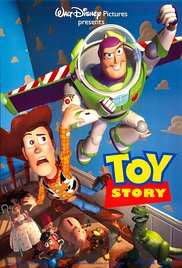

In [32]:
from IPython.display import Image
di = data_path
image = Image(base_images_path+'/114709.jpg')
image
